# Analyse des Ventes , RFM et Segmentation Client


This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Comprehensive Customer Analytics: Understanding your customer's spending habits and purchasing behavior is key. CRM analytics provide concrete answers to questions like quarterly spending and buying patterns, enabling you to fine-tune your marketing approaches.

Il s'agit d'un ensemble de données transactionnelles qui contient toutes les transactions ayant eu lieu entre le 01/12/2010 et le 09/12/2011 pour une entreprise de vente au détail en ligne basée au Royaume-Uni et enregistrée, mais n'ayant pas de magasin physique. L'entreprise se spécialise principalement dans la vente de cadeaux uniques pour toutes les occasions. De nombreux clients de l'entreprise sont des grossistes.

# SOMMAIRE

* 1. [Exploration et Préparation des données](#chapter1)
    * 1.1 [Importation des librairies Python](#section_1_1)
    * 1.2 [Importation des données](#section_1_2)
    * 1.3 [Vérification des données](#section_1_3)
        * 1.3.1 [Vérification des valeurs manquantes](#section_1_3_1)
        * 1.3.2 [Vérification des types de données](#section_1_3_2)
        * 1.3.3 [Vérification des doublons](#section_1_3_3)
    * 1.4 [Exploration des données](#section_1_4)
        * 1.4.1 [The InvoiceDate](#section_1_4_1)
        * 1.4.2 [Unit Price and Quantity](#section_1_4_2)
        * 1.4.3 [Quantities](#section_1_4_3)
        * 1.4.4 [The invoice number](#section_1_4_4)
        * 1.4.5 [Stockcodes](#section_1_4_5)
        * 1.4.6 [Customers](#section_1_4_6)
        * 1.4.7 [Countries](#section_1_4_7)


* 2. [Analyse des données](#chapter2)
    * 2.1 [Analyse des annulations ](#section_2_1)
    * 2.2 [Analyses du nombre de transactions](#section_2_2)
        * 2.2.1 [Evolution du nombre de Transactions](#section_2_2_1)
        * 2.2.2 [Transactions par mois](#section_2_2_2)
        * 2.2.3 [Transactions par jour de la semaine](#section_2_2_3)
        * 2.2.4 [Transactions par pays](#section_2_2_4)
    * 2.3 [Chiffre d’affaires ](#section_2_3)
        * 2.3.1 [Chiffre d’affaires total et par trimestre](#section_2_3_1)
        * 2.3.2 [Chiffre d’affaires par mois ](#section_2_3_2)
        * 2.3.3 [Chiffre d’affaires en fonction du jour de la semaine ](#section_2_3_3)
        * 2.3.4 [Chiffre d’affaires par pays ](#section_2_3_4)
        * 2.3.5 [Répartition du CA entre les clients](#section_2_3_5)

    * 2.4 [Etude du panier moyen](#section_2_4)
        * 2.4.1 [Etude de la taille et du prix du panier moyen](#section_2_4_1)
        * 2.4.2 [Etude du panier moyen par pays](#section_2_4_2)
        * 2.4.3 [Chiffre d’affaires en fonction du jour de la semaine ](#section_2_4_3)
        * 2.4.4 [Chiffre d’affaires par pays ](#section_2_4_4)
        * 2.4.5 [Répartition du CA entre les clients](#section_2_4_5)


* 3. [Analyse RFM et Segmenation clients](#chapter3)
    * 3.1 [RFM](#section_3_1)
    * 3.2 [Traitement des Outliers](#section_3_2)
    * 3.3 [RFM Scores et segmenattion clients](#section_3_3)
        * 3.3.1 [RFM Scores](#section_3_3_1)
        * 3.3.2 [Segmentation Clients](#section_3_3_2)
    * 3.4 [Segmentation K-means](#section_3_4)
        * 3.4.1 [Scaling (Mise à l'échelle)](#section_3_4_1)
        * 3.4.2 [PCA](#section_3_4_2)
        * 3.4.3 [Évaluation du Nombre Optimal de Clusters](#section_3_4_3)
        * 3.4.4 [Analyse et Interprétation des Clusters K-means ](#section_3_4_4)

## 1 Exploration et préparation des données<a id="chapter1"></a>

### 1.1 Importation des librairies Python <a class="anchor" id="section_1_1"></a>

In [1]:
import os
import datetime
import warnings
import pandas as pd
import numpy as np
import datetime as dt
from operator import attrgetter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
)
from lifetimes import BetaGeoFitter, GammaGammaFitter
from lifetimes.plotting import plot_period_transactions

warnings.filterwarnings("ignore")
palette = "Set2"

### 1.2 Importation des données <a class="anchor" id="section_1_2"></a>

In [2]:
data = pd.read_csv("data.csv", sep=",", encoding="latin1")
data.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

Nous pouvons constater que le fichier de données contient des informations pour chaque transaction individuelle.

Jetons un coup d'œil au numéro de facture (InvoiceNo) et au numéro de client (CustomerID) des premières entrées. Ici, nous pouvons voir qu'un client avec l'ID 17850 du Royaume-Uni a passé une seule commande avec le numéro de facture 536365. Le client a commandé plusieurs produits avec différents codes de stock, descriptions, prix unitaires et quantités. De plus, nous pouvons voir que la date de la facture était la même pour ces produits.

Description des Variables

- InvoiceNo : Numéro de facture composé de 6 chiffres. Si ce code commence par la lettre 'c', cela indique une annulation.
- StockCode : Code produit composé de 5 chiffres.
- Description : Nom du produit.
- Quantity : Quantité de chaque produit par transaction.
- InvoiceDate : Représente le jour et l'heure de chaque transaction.
- UnitPrice : Prix du produit par unité.
- CustomerID : Numéro de client composé de 5 chiffres. Chaque client a un identifiant unique.
- Country : Nom du pays où réside chaque client.

In [3]:
data.shape

(541909, 8)

### 1.3 Vérification des données  <a class="anchor" id="section_1_3"></a>

#### 1.3.1 Vérification des valeurs manquantes  <a class="anchor" id="section_1_3_1"></a> 

In [4]:
missing_percentage = data.isnull().sum() / data.shape[0] * 100
missing_percentage

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [5]:
# Supprimer les lignes avec des CustomerID nuls
data = data.dropna(subset=["CustomerID"])

In [6]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Le fait de supprimer les lignes avec des valeurs nulles dans la colonne 'CustomerID' nous a également supprimer les lignes avec 'Description' nuls

#### 1.3.2 Vérification et Transformation de types de données <a class="anchor" id="section_1_3_1"></a> 

In [7]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [8]:
# Convert columns
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])
data["CustomerID"] = data["CustomerID"].astype(int)

data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int32
Country                object
dtype: object

####  1.3.3 Recherche de doublons <a class="anchor" id="section_1_3_3"></a> 

In [9]:
duplicates = data.duplicated()
# Afficher les lignes doublonnées
duplicate_rows = data[duplicates]

# Afficher les informations sur les doublons
print("Nombre de doublons : ", len(duplicate_rows))
print("\nExemple de lignes doublonnées : ")
print(duplicate_rows)

Nombre de doublons :  5225

Exemple de lignes doublonnées : 
       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice 

Il nous indique des doublons mais en regardant bien meme tansaction meme client mais produits differents.

In [10]:
pd.DataFrame(
    [
        {
            "products": len(data["StockCode"].value_counts()),
            "transactions": len(data["InvoiceNo"].value_counts()),
            "customers": len(data["CustomerID"].value_counts()),
        }
    ],
    columns=["products", "transactions", "customers"],
    index=["quantity"],
)

products  transactions  customers
quantity      3684         22190       4372

### 1.4 Exploration des données  <a class="anchor" id="section_1_4"></a>

#### 1.4.1 The InvoiceDate <a class="anchor" id="section_1_4_1"></a>

In [11]:
print("Datafile starts with timepoint {}".format(data.InvoiceDate.min()))
print("Datafile ends with timepoint {}".format(data.InvoiceDate.max()))

Datafile starts with timepoint 2010-12-01 08:26:00
Datafile ends with timepoint 2011-12-09 12:50:00


#### 1.4.2 Unit Price and Quantity <a class="anchor" id="section_1_4_2"></a>

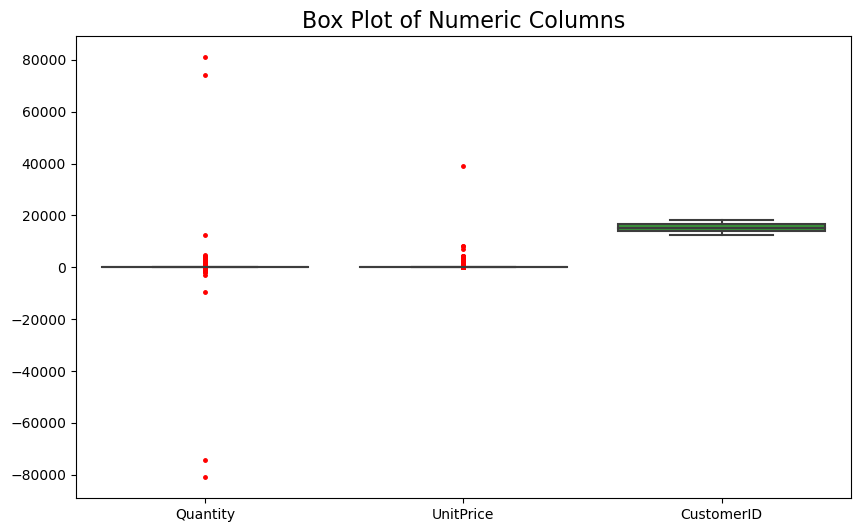

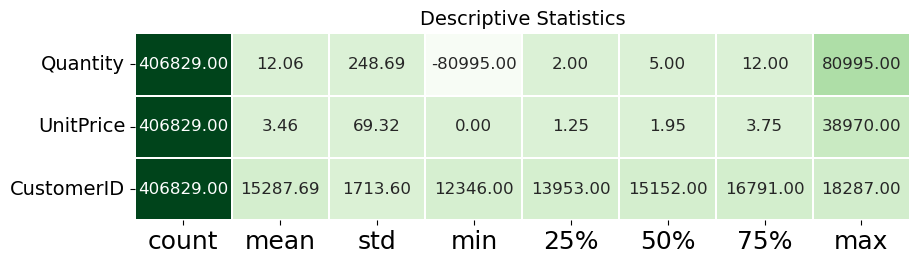

In [12]:
# Assuming data is your DataFrame
numeric_columns = data.select_dtypes(include=[float, int])

# Create a box plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
flierprops = dict(
    marker="o", markersize=2.5, markeredgecolor="red", markerfacecolor="red", alpha=1
)
sns.boxplot(data=numeric_columns, flierprops=flierprops)
plt.title("Box Plot of Numeric Columns", fontsize=16)
plt.show()


def desc_stats(dataframe):
    desc_df = pd.DataFrame(
        index=dataframe.columns,
        columns=dataframe.describe().T.columns,
        data=dataframe.describe().T,
    )

    f, ax = plt.subplots(figsize=(10, desc_df.shape[0] * 0.81))
    sns.heatmap(
        desc_df,
        annot=True,
        cmap="Greens",
        fmt=".2f",
        ax=ax,
        linecolor="white",
        linewidths=1.1,
        cbar=False,
        annot_kws={"size": 12},
    )
    plt.xticks(size=18)
    plt.yticks(size=14, rotation=0)
    plt.title("Descriptive Statistics", size=14)
    plt.show()


desc_stats(numeric_columns)

On remarque la présence de quantité négative surement lié aux retour et annulation.
Nous remarquons également que certains produits ont un prix indiqué à 0.

In [13]:
data.loc[data.UnitPrice == 0].sort_values(by="Quantity", ascending=False).head()

InvoiceNo StockCode                          Description  Quantity  \
502122    578841     84826       ASSTD DESIGN 3D PAPER STICKERS     12540   
298054    562973     23157           SET OF 6 NATIVITY MAGNETS        240   
436428    574138     23234        BISCUIT TIN VINTAGE CHRISTMAS       216   
314746    564651     23268  SET OF 2 CERAMIC CHRISTMAS REINDEER       192   
314747    564651     22955             36 FOIL STAR CAKE CASES        144   

               InvoiceDate  UnitPrice  CustomerID         Country  
502122 2011-11-25 15:57:00        0.0       13256  United Kingdom  
298054 2011-08-11 11:42:00        0.0       14911            EIRE  
436428 2011-11-03 11:26:00        0.0       12415       Australia  
314746 2011-08-26 14:19:00        0.0       14646     Netherlands  
314747 2011-08-26 14:19:00        0.0       14646     Netherlands

Nous avons des prix unitaires de zéro.
On ne sait pas s'il s'agit de cadeaux pour les clients ou non. Nous allons les supprimer.

In [14]:
data = data.loc[data.UnitPrice > 0].copy()

### 1.4.3 Quantities <a class="anchor" id="section_1_4_3"></a>

Regardons la distribution:

Text(0.5, 0, 'Natural-Log Quantity')

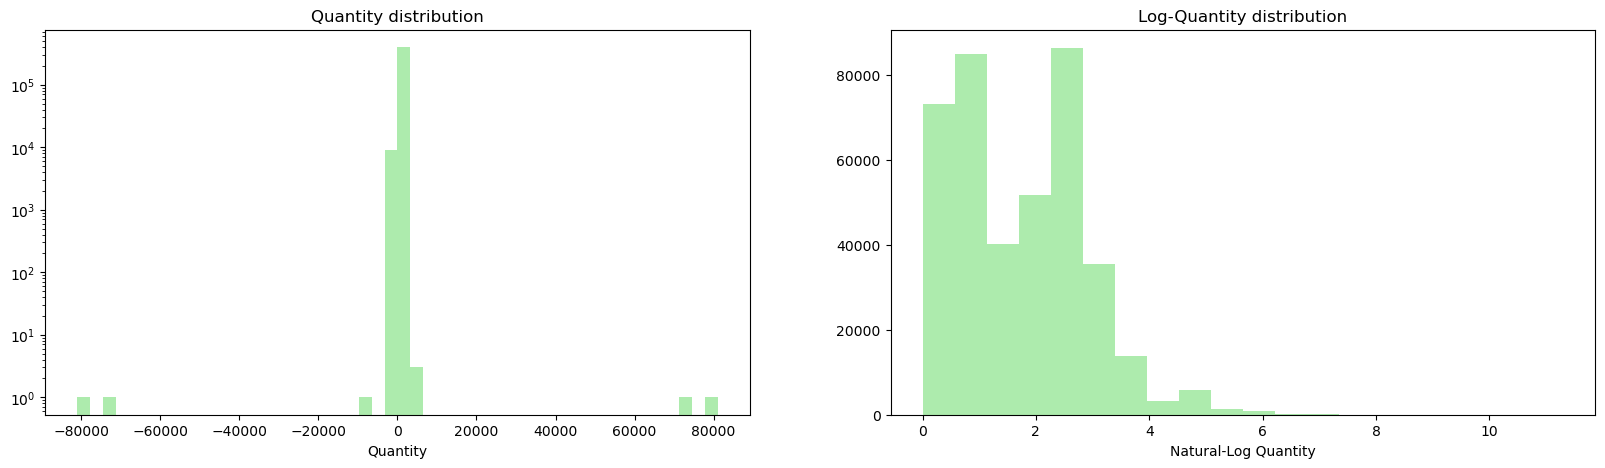

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.distplot(data.Quantity, ax=ax[0], kde=False, color="limegreen")
sns.distplot(np.log(data.Quantity), ax=ax[1], bins=20, kde=False, color="limegreen")
ax[0].set_title("Quantity distribution")
ax[0].set_yscale("log")
ax[1].set_title("Log-Quantity distribution")
ax[1].set_xlabel("Natural-Log Quantity")

Les valeurs négatives indiquent probablement des retours. C'est un facteur important pour analyser les produits les plus retournés...

### 1.4.4 The invoice number <a class="anchor" id="section_1_4_4"></a>

Dans la description des données, nous pouvons voir qu'une transaction annulée commence par un "C" devant. Créons une caractéristique pour filtrer facilement ces cas :

In [16]:
data["IsCancelled"] = np.where(data.InvoiceNo.apply(lambda l: l[0] == "C"), True, False)
data.IsCancelled.value_counts() / data.shape[0] * 100

False    97.810904
True      2.189096
Name: IsCancelled, dtype: float64

2,2 % des transactions sont des annullations.

In [17]:
df_return = data.loc[data.IsCancelled == True]
df_return.describe()

Quantity     UnitPrice    CustomerID
count   8905.000000   8905.000000   8905.000000
mean     -30.859966     18.845519  14991.667266
std     1170.154939    444.366043   1706.772357
min   -80995.000000      0.010000  12346.000000
25%       -6.000000      1.450000  13510.000000
50%       -2.000000      2.950000  14895.000000
75%       -1.000000      4.950000  16393.000000
max       -1.000000  38970.000000  18282.000000

Toutes les annulations ont des quantités négatives mais des prix unitaires positifs et non nuls. Nous analyseront par la suite lces annulations. Pour la suite de notre analyse nous allons les supprimer pour nous concentrer que sur les ventes.

In [18]:
data = data.loc[data.IsCancelled == False].copy()
data = data.drop("IsCancelled", axis=1)

Le numéro de facture (Invoice Number); combien de numéros de facture différents avons-nous ?

In [19]:
data.InvoiceNo.nunique()

18532

### 1.4.5 Stockcodes <a class="anchor" id="section_1_4_5"></a>

Combien de stockcodes différents avons-nous?

In [20]:
data.StockCode.nunique()

3665

Quels codes sont les plus courants ?

Text(0, 0.5, 'Frequency')

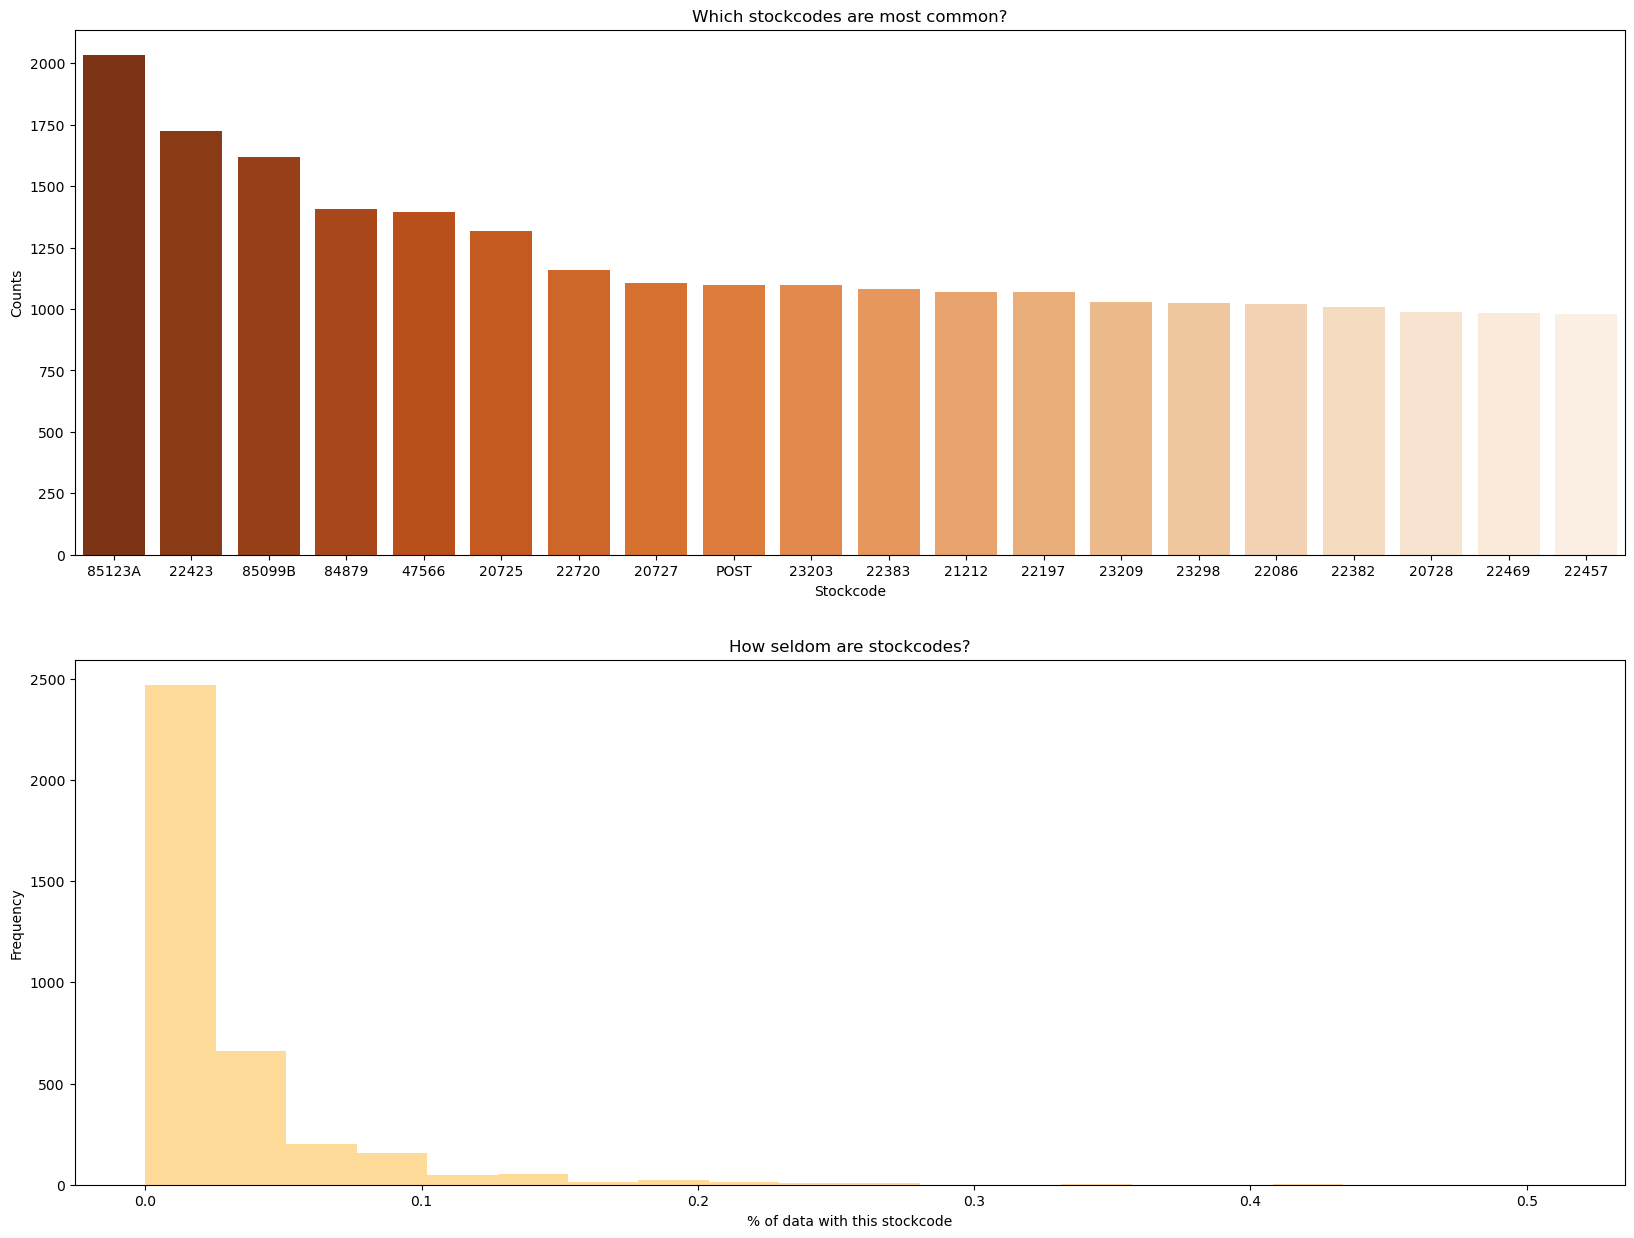

In [21]:
stockcode_counts = data.StockCode.value_counts().sort_values(ascending=False)

fig, ax = plt.subplots(2, 1, figsize=(20, 15))

sns.barplot(
    stockcode_counts.iloc[0:20].index,
    stockcode_counts.iloc[0:20].values,
    ax=ax[0],
    palette="Oranges_r",
)
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Stockcode")
ax[0].set_title("Which stockcodes are most common?")

sns.distplot(
    np.round(stockcode_counts / data.shape[0] * 100, 2),
    kde=False,
    bins=20,
    ax=ax[1],
    color="Orange",
)
ax[1].set_title("How seldom are stockcodes?")
ax[1].set_xlabel("% of data with this stockcode")
ax[1].set_ylabel("Frequency")

- Le code POST fait aprti du plus grand nombre de occurrences parmi les stockcodes ?! Son code est plus court que les autres et n'est pas numérique.
- La plupart des stockcodes sont très rares. Cela indique que le détaillant vend de nombreux produits différents et qu'il n'y a pas de spécialisation marquée pour un code particulier. Cependant, il faut être prudent car cela ne signifie pas nécessairement que le détaillant n'est pas spécialisé dans un type de produit spécifique. Le stockcode pourrait être un indicateur très détaillé qui ne fournit pas d'informations sur le type de produit.

### 1.4.6 Customers <a class="anchor" id="section_1_4_6"></a>

In [22]:
data.CustomerID.nunique()

4338

Text(0.5, 1.0, 'Which customers are most common?')

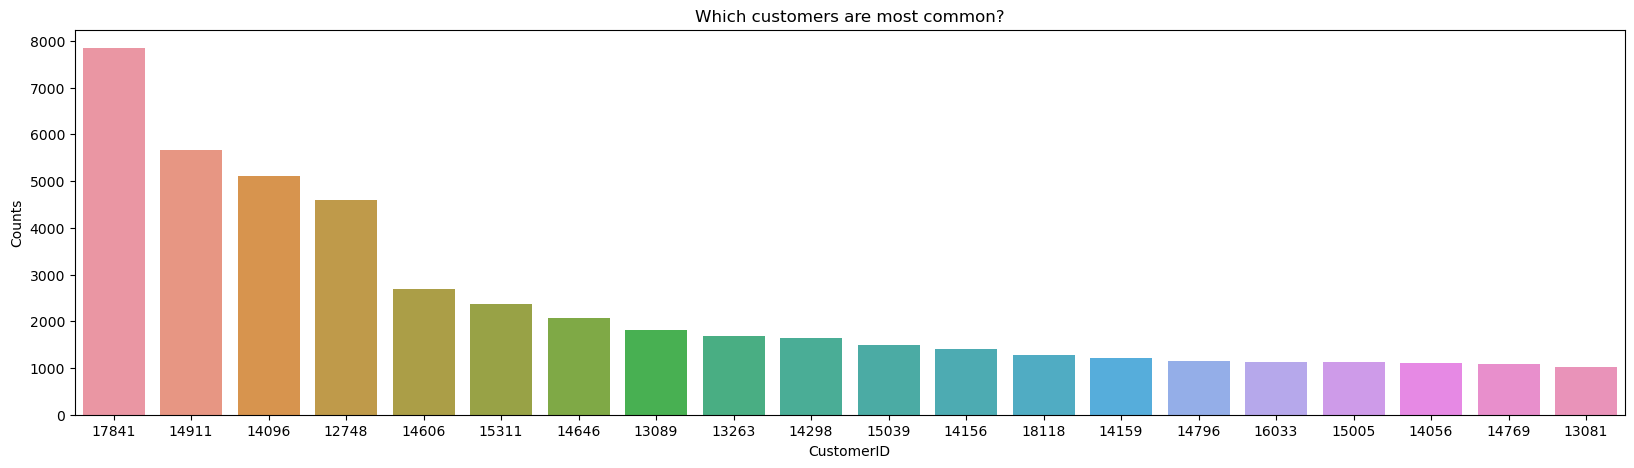

In [23]:
customer_counts = data.CustomerID.value_counts().sort_values(ascending=False).iloc[0:20]
plt.figure(figsize=(20, 5))
sns.barplot(customer_counts.index, customer_counts.values, order=customer_counts.index)
plt.ylabel("Counts")
plt.xlabel("CustomerID")
plt.title("Which customers are most common?")
# plt.xticks(rotation=90);

### 1.4.7 Countries <a class="anchor" id="section_1_4_7"></a>

Combien de pays différents sont desservis par le détaillant ?

In [24]:
data.Country.nunique()

37

Text(0.5, 1.0, 'Which Country are most common?')

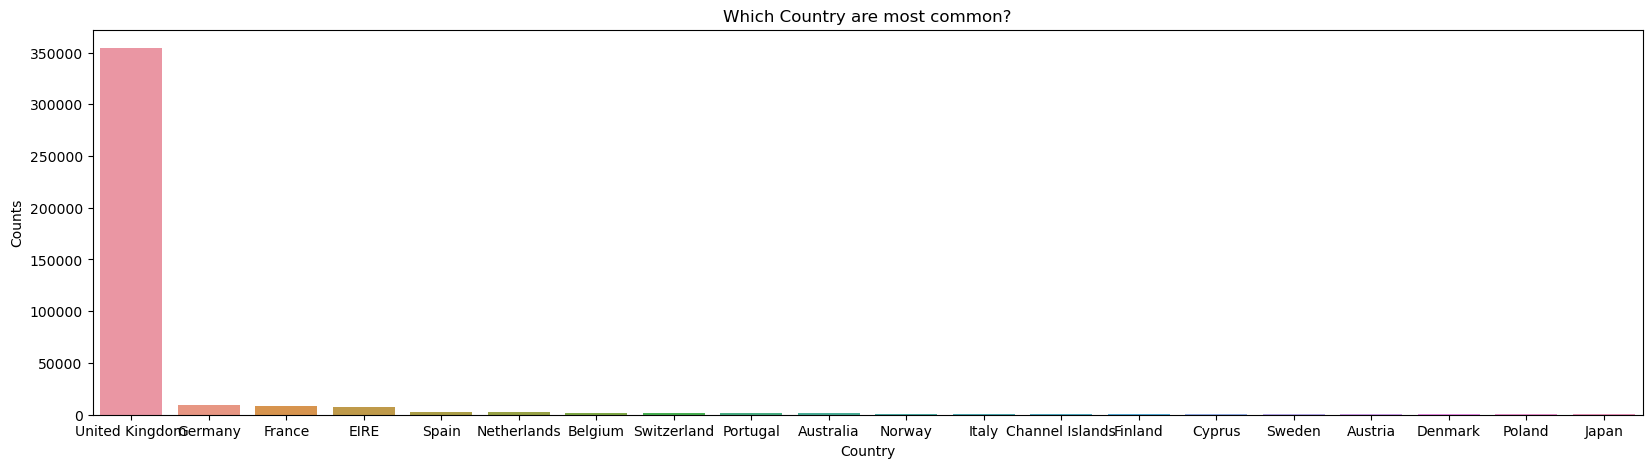

In [25]:
Country_counts = data.Country.value_counts().sort_values(ascending=False).iloc[0:20]
plt.figure(figsize=(20, 5))
sns.barplot(Country_counts.index, Country_counts.values, order=Country_counts.index)
plt.ylabel("Counts")
plt.xlabel("Country")
plt.title("Which Country are most common?")

In [26]:
data.Country.value_counts(normalize = True)

United Kingdom          0.890513
Germany                 0.022720
France                  0.020963
EIRE                    0.018186
Spain                   0.006243
Netherlands             0.005929
Belgium                 0.005105
Switzerland             0.004627
Portugal                0.003674
Australia               0.002971
Norway                  0.002692
Italy                   0.001905
Channel Islands         0.001880
Finland                 0.001722
Cyprus                  0.001543
Sweden                  0.001133
Austria                 0.001000
Denmark                 0.000955
Poland                  0.000829
Japan                   0.000807
Israel                  0.000623
Unspecified             0.000613
Singapore               0.000558
Iceland                 0.000457
USA                     0.000450
Canada                  0.000380
Greece                  0.000364
Malta                   0.000281
United Arab Emirates    0.000171
European Community      0.000151
RSA       

Les clients du Royaume-Uni représentent la majorité des données historiques de nos clients (91% des clients).

## 2 Analyse des données: CA et du nombre de transactions<a class="anchor" id="chapter2"></a>

### 2.1 Analyse des annulations <a class="anchor" id="section_2_1"></a>

In [27]:
df_return

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  IsCancelled  
141    2010-12-01 09:41:00      27.50       14527  United Kingdom         True  
154    2010-12-01 09:49:00       4.65       15311  United Kingdom         True  
235    2010-12-01 10:24:00       1.65       17548  United Kingdom         True  
236    2010-12-01 10:24:00       0.29       17548  United Kingdom         True  
237    2010-12-01 10:24:00       0.29       17548  United Kingdom         True  
...                    ...        ...         ...             ...          ...  
540449 2011-12-09 09:57:00       0.83       14397  United Kingdom         True  
541541 2011-12-09 10:28:00     224.69       15498  United Kingdom         True  
541715 2011-12-09 11:57:00      10.95       15311  United Kingdom         True  
541716 2011-12-09 11:58:00       1.25       17315  United Kingdom         True  
541717 2011-12-09 11:58:00       1.25       17315  United Kingdom         True  

[8905 rows x 9 columns]

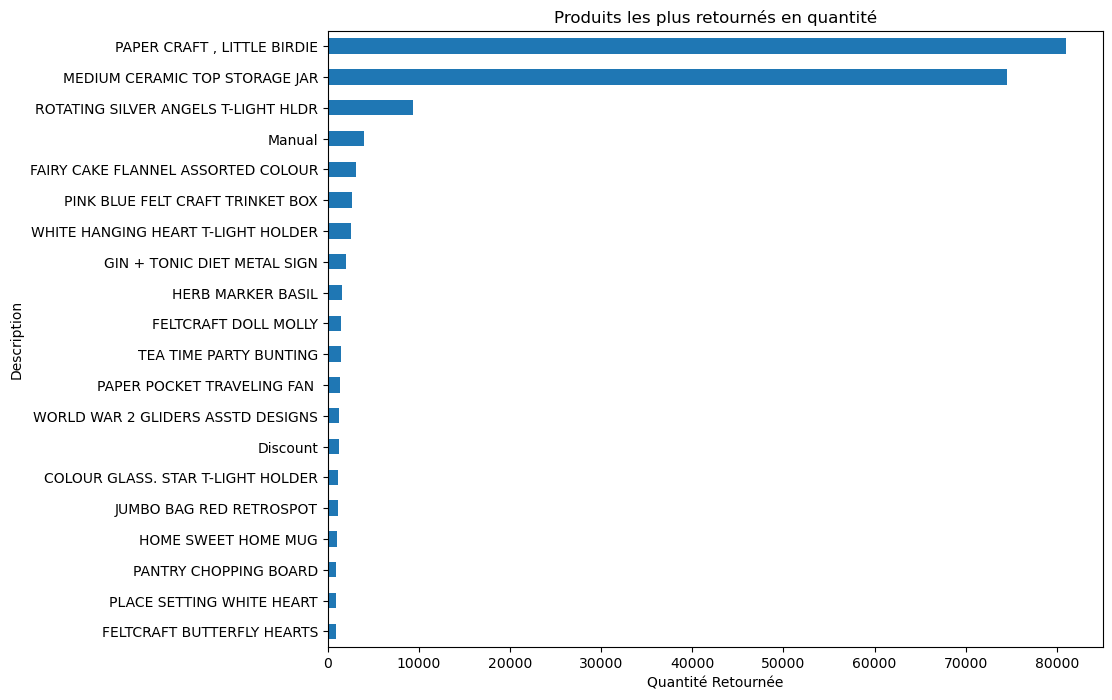

In [28]:
# Regrouper par Description et calculer la somme des quantités retournées
total_quantity_returned = df_return.groupby("Description")["Quantity"].sum()
total_quantity_returned = abs(total_quantity_returned)

# Trier les valeurs par ordre décroissant et sélectionner les 30 premières
top_30_returned_products = total_quantity_returned.sort_values(ascending=True).tail(20)

# Créer le graphique à barres horizontales
fig, ax = plt.subplots(figsize=(10, 8))
top_30_returned_products.plot(kind="barh", ax=ax)

# Ajouter des étiquettes
plt.xlabel("Quantité Retournée")
plt.ylabel("Description")
plt.title("Produits les plus retournés en quantité")

# Afficher le graphique
plt.show()

Il semble que les articles "Paper craft little birdie" et "Medium ceramic top storage jar" sont parmi les principaux contributeurs aux entrées de prix négatifs. 

Nous allons Calculer le ratio de retour par produit : On calcule le ratio de retour pour chaque produit en divisant la quantité retournée par la quantité totale vendue.

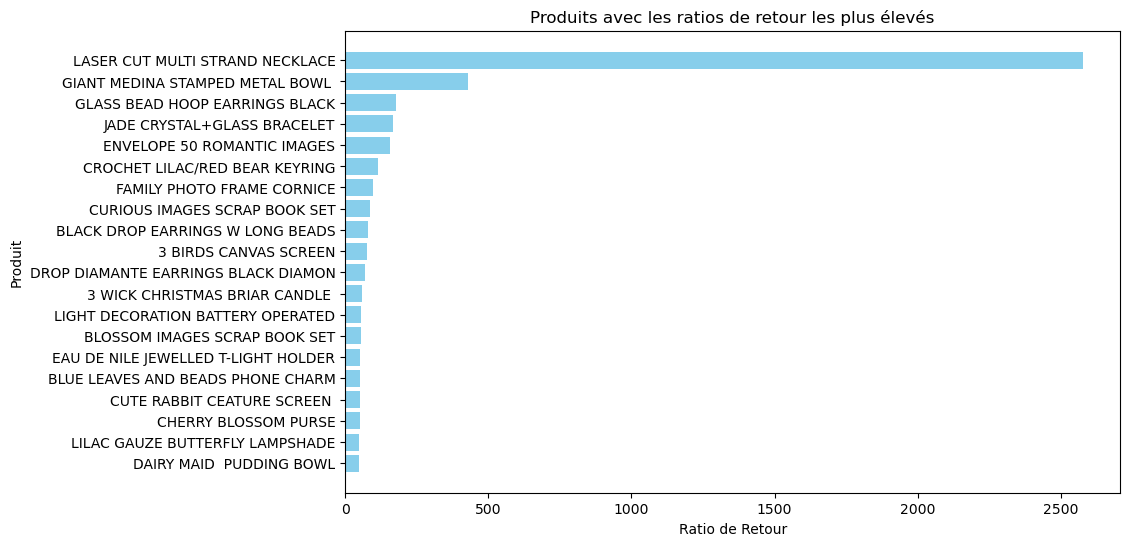

In [29]:
total_quantity_sold = data.groupby("Description")["Quantity"].sum()
total_quantity_returned = df_return.groupby("Description")["Quantity"].sum()
total_quantity_returned = abs(total_quantity_returned)

# Renommer la colonne "Quantity" en "Total_Quantity_Sold"
total_quantity_sold = total_quantity_sold.reset_index().rename(
    columns={"Quantity": "Total_Quantity_Sold"}
)
total_quantity_returned = total_quantity_returned.reset_index().rename(
    columns={"Quantity": "Total_Quantity_Returned"}
)

# Calculer les ratios de retour par produit
total_quantity_sold["Total_Quantity_Returned"] = total_quantity_returned[
    "Total_Quantity_Returned"
]

# Calculer les ratios de retour par produit
total_quantity_sold["ReturnRatio"] = (
    total_quantity_sold["Total_Quantity_Returned"]
    / total_quantity_sold["Total_Quantity_Sold"]
)

# Produits avec les ratios de retour les plus élevés
top_products_return_ratio = total_quantity_sold.sort_values(
    by="ReturnRatio", ascending=False
).head(20)

# Créer un graphique à barres horizontales
plt.figure(figsize=(10, 6))

# Créer un graphique à barres horizontales
plt.barh(
    top_products_return_ratio["Description"],
    top_products_return_ratio["ReturnRatio"],
    color="skyblue",
)

# Ajouter des étiquettes et un titre
plt.xlabel("Ratio de Retour")
plt.ylabel("Produit")
plt.title("Produits avec les ratios de retour les plus élevés")

# Inverser l'ordre pour avoir le produit avec le ratio le plus élevé en haut
plt.gca().invert_yaxis()

# Afficher le graphique
plt.show()

Les produits les plus sujets aux retours sont "Laser cut multi strand necklace".

Nous allons maintenant Calculer le ratio de retour par client pour identifeir les clients avec les ratios de retour les plus élevés: Pour chaque client,on divise la quantité retournée par la quantité totale achetée. 

In [30]:
# Calculer les quantités retournées par client
total_quantity_sold = data.groupby("CustomerID")["Quantity"].sum()
total_quantity_returned = df_return.groupby("CustomerID")["Quantity"].sum()
total_quantity_returned = abs(total_quantity_returned)

# Renommer les colonnes
total_quantity_sold = total_quantity_sold.reset_index().rename(
    columns={"Quantity": "Total_Quantity_Sold"}
)
total_quantity_returned = total_quantity_returned.reset_index().rename(
    columns={"Quantity": "Total_Quantity_Returned"}
)

# Calculer les ratios de retour par produit
total_quantity_sold["Total_Quantity_Returned"] = total_quantity_returned[
    "Total_Quantity_Returned"
]

# Calculer les ratios de retour par client
total_quantity_sold["ReturnRatio"] = (
    total_quantity_sold["Total_Quantity_Returned"]
    / total_quantity_sold["Total_Quantity_Sold"]
)

# Client avec le ratio de retour le plus important
top_customer_return_ratio = total_quantity_sold.sort_values(
    by="ReturnRatio", ascending=False
).head(10)

top_customer_return_ratio

CustomerID  Total_Quantity_Sold  Total_Quantity_Returned  ReturnRatio
1136       13883                 1436                  80995.0    56.403203
998        13697                  177                   9361.0    52.887006
722        13307                    4                    183.0    45.750000
887        13529                   74                   2022.0    27.324324
1362       14199                   28                    711.0    25.392857
642        13194                   26                    510.0    19.615385
736        13323                  175                   3335.0    19.057143
185        12579                  285                   4627.0    16.235088
1039       13750                  516                   8060.0    15.620155
899        13551                   12                    162.0    13.500000

### 2.2 Analyses du nombre de transactions <a class="anchor" id="section_2_2"></a>

#### 2.2.1 Evolution du nombre de Transactions <a class="anchor" id="section_2_2_1"></a>

Centrons-nous sur les ventes quotidiennes de produits. 

Comme nous souhaitons prédire le montant quotidien des ventes de produits, nous devons effectuer une agrégation quotidienne de ces données. À cette fin, nous devons extraire des caractéristiques temporelles de la colonne "InvoiceDate". 

Nous allons calculer le chiffre d'affaires généré par une transaction en utilisant le prix unitaire et la quantité :

In [31]:
# Ajout des nouvelles colonnes
data["Revenue"] = data.Quantity * data.UnitPrice

data["Year"] = data.InvoiceDate.dt.year
data["Quarter"] = data.InvoiceDate.dt.quarter
data["Month"] = data.InvoiceDate.dt.month
data["Week"] = data.InvoiceDate.dt.week
data["Weekday"] = data.InvoiceDate.dt.weekday
data["Day"] = data.InvoiceDate.dt.day
data["Dayofyear"] = data.InvoiceDate.dt.dayofyear
data["Date"] = pd.to_datetime(data[["Year", "Month", "Day"]])

Pour prédire la quantité de produits vendus par jour, nous pouvons additionner les quantités quotidiennes par code de produit (stockcode) :

In [32]:
grouped_features = [
    "Date",
    "Year",
    "Quarter",
    "Month",
    "Week",
    "Weekday",
    "Dayofyear",
    "Day",
    "StockCode",
]

In [33]:
daily_data = pd.DataFrame(
    data.groupby(grouped_features).Quantity.sum(), columns=["Quantity"]
)
daily_data["Revenue"] = data.groupby(grouped_features).Revenue.sum()
daily_data = daily_data.reset_index()
daily_data.head(5)

Date  Year  Quarter  Month  Week  Weekday  Dayofyear  Day StockCode  \
0 2010-12-01  2010        4     12    48        2        335    1     10002   
1 2010-12-01  2010        4     12    48        2        335    1     10125   
2 2010-12-01  2010        4     12    48        2        335    1     10133   
3 2010-12-01  2010        4     12    48        2        335    1    15044B   
4 2010-12-01  2010        4     12    48        2        335    1   15056BL   

   Quantity  Revenue  
0        60    51.00  
1         2     1.70  
2         5     4.25  
3         1     2.95  
4        20   113.00

Text(0.5, 1.0, 'How many quantities are sold per day over the given time?')

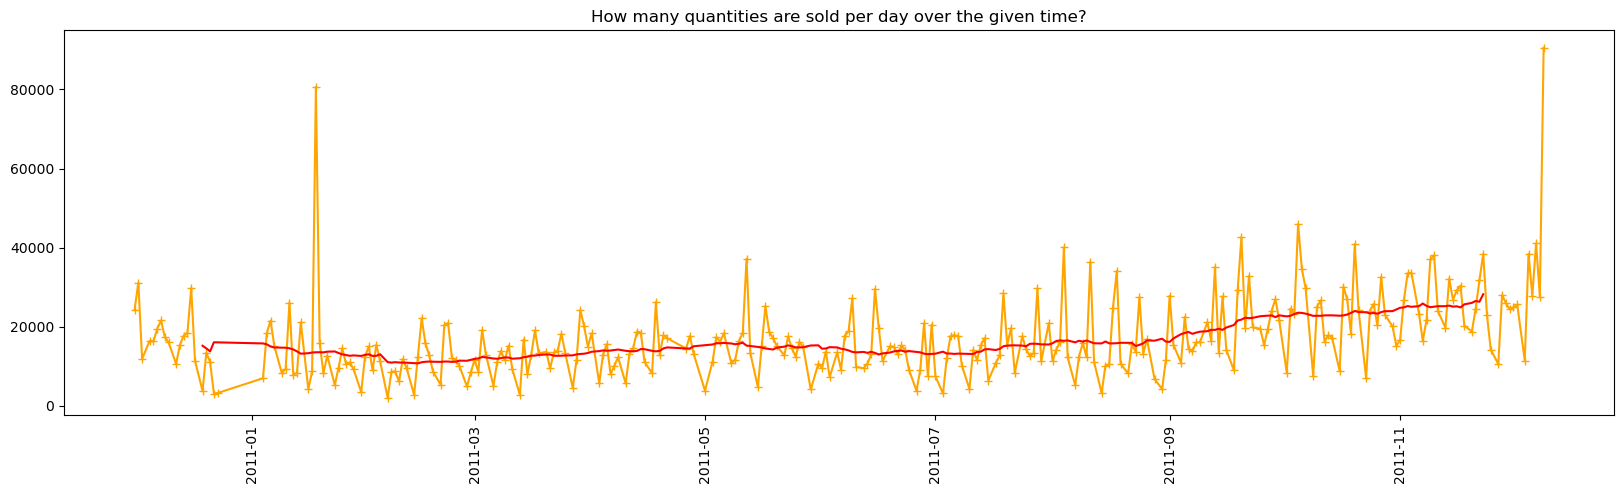

In [34]:
plt.figure(figsize=(20, 5))
plt.plot(daily_data.groupby("Date").Quantity.sum(), marker="+", c="orange")
plt.plot(
    daily_data.groupby("Date").Quantity.sum().rolling(window=30, center=True).mean(),
    c="red",
)
plt.xticks(rotation=90)
plt.title("Quelle quantité d'articles est vendue par jour sur la période donnée ?")

#### 2.1.2 Transactions par mois <a class="anchor" id="section_2_1_2"></a>

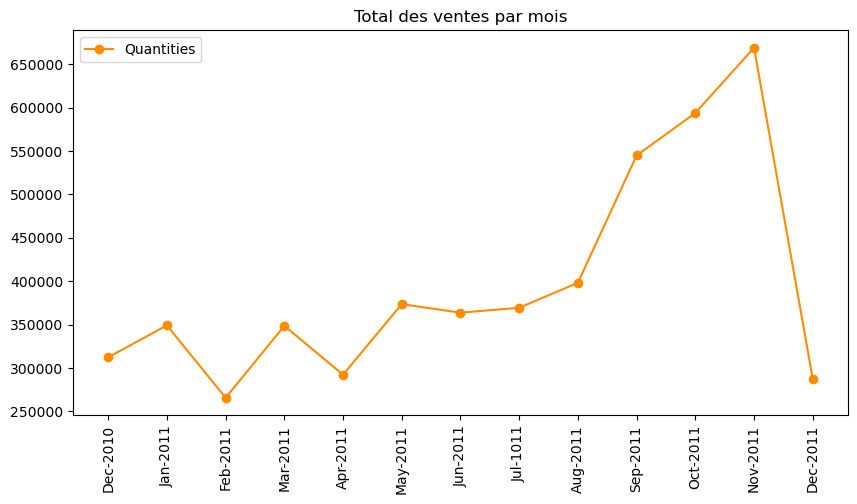

In [35]:
yearmonth = [
    "Dec-2010",
    "Jan-2011",
    "Feb-2011",
    "Mar-2011",
    "Apr-2011",
    "May-2011",
    "Jun-2011",
    "Jul-1011",
    "Aug-2011",
    "Sep-2011",
    "Oct-2011",
    "Nov-2011",
    "Dec-2011",
]

# Graphique pour les mois
plt.figure(figsize=(10, 5))
plt.plot(
    daily_data.groupby(["Year", "Month"]).Quantity.sum().values,
    marker="o",
    label="Quantities",
    c="darkorange",
)
plt.xticks(np.arange(0, len(yearmonth)), yearmonth, rotation=90)
plt.legend()
plt.title("Total des ventes par mois")

# Afficher les graphiques
plt.show()

Nous observons:
- La saison pré-Noël commence en septembre et atteint son pic en novembre.
- Février et avril sont des mois avec très peu de ventes.

#### 2.2.2 Transactions par jour de la semaine <a class="anchor" id="section_2_2_2"></a>

In [36]:
weekdays = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

# Graphique pour les jours de la semaine
plt.figure(figsize=(10, 5))
daily_data.groupby("Weekday").Quantity.sum().plot(
    marker="o", label="Quantity", c="darkorange"
)
plt.legend()
plt.xticks(np.arange(0, 7), weekdays)
plt.xlabel("")
plt.title("Total des ventes par jour de la semaine")

# Afficher les graphiques
plt.show()

Nous observons:
- Le jeudi semble être le jour où la plupart des produits sont vendus.
- En revanche, le vendredi et le dimanche ont très peu de transactions.
- Le samedi, il n'y a aucune transaction du tout.

#### 2.2.3 Transactions par pays<a class="anchor" id="section_2_2_3"></a>

In [37]:
# Create a world map dataframe
world_map = (
    data.groupby(["CustomerID", "InvoiceNo", "Country"])
    .size()
    .reset_index(name="Count")
)

# Count the occurrences of each country
countries = world_map["Country"].value_counts()

# Create data for choropleth map
map = dict(
    type="choropleth",
    locations=countries.index,
    locationmode="country names",
    z=countries,
    text=countries.index,
    colorbar={"title": "Orders"},
    colorscale="Viridis",
    reversescale=False,
)

# Define layout
layout = dict(
    title={
        "text": "Number of Orders by Countries",
        "y": 0.9,
        "x": 0.5,
        "xanchor": "center",
        "yanchor": "top",
    },
    geo=dict(
        resolution=50,
        showocean=True,
        oceancolor="LightBlue",
        showland=True,
        landcolor="whitesmoke",
        showframe=True,
    ),
    template="plotly_white",
    height=600,
    width=1000,
)

# Create choropleth map figure
choromap = go.Figure(data=[map], layout=layout)

# Plot the map
iplot(choromap, validate=False)

### 2.3 Chiffre d’affaires <a class="anchor" id="section_2_3"></a>

#### 2.3.1 Chiffre d’affaires total et par trimestre<a class="anchor" id="section_2_3_1"></a>

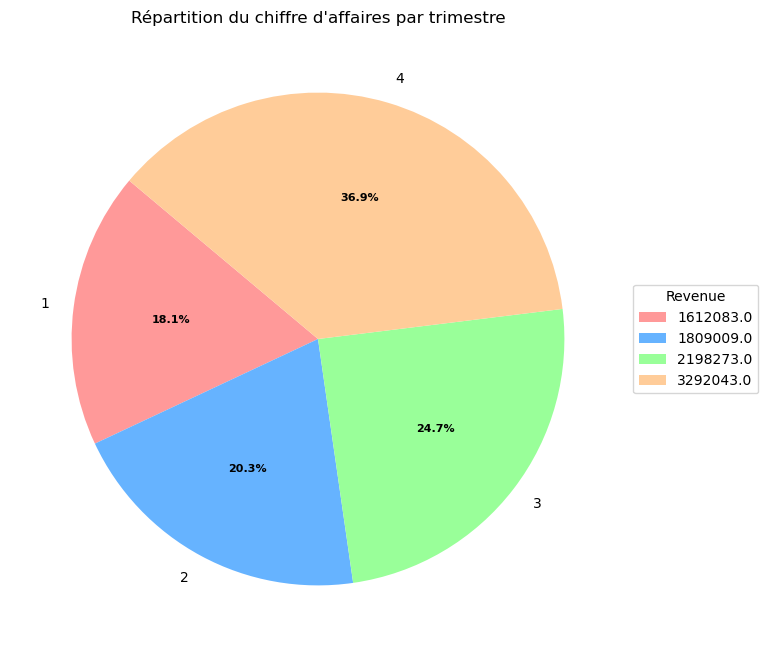

In [38]:
# Calcul du chiffre d'affaires par trimestre
Revenue_trimestre = data.groupby(by=["Quarter"], as_index=False)[["Revenue"]].sum()

# Arrondir le chiffre d'affaires à l'unité
Revenue_trimestre["Revenue"] = round(Revenue_trimestre["Revenue"])

# Création du diagramme camembert
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    Revenue_trimestre["Revenue"],
    labels=Revenue_trimestre["Quarter"].astype(str),  # Utiliser le chiffre d'affaires comme étiquettes
    autopct="%1.1f%%",
    startangle=140,
    colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"],
)

# Ajouter les légendes
plt.legend(wedges, Revenue_trimestre["Revenue"].astype(str), title="Revenue", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")

plt.title("Répartition du chiffre d'affaires par trimestre")

plt.show()


#### 2.3.2 Chiffre d’affaires par mois <a class="anchor" id="section_2_3_2"></a>

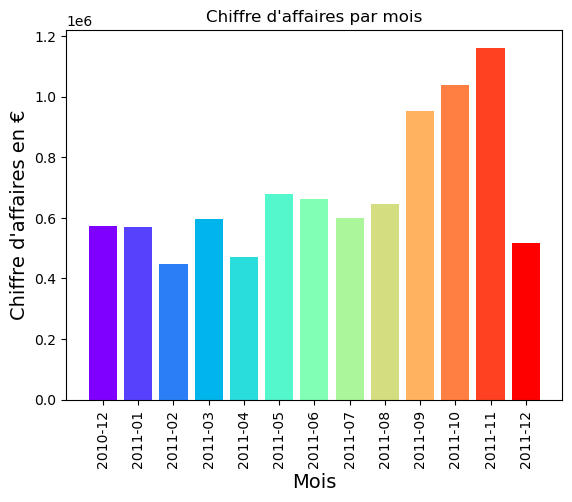

In [39]:
from matplotlib.cm import get_cmap

# Calcul du chiffre d'affaires par mois
Revenue_mois = data.groupby(data["Date"].dt.to_period("M"))["Revenue"].sum()

# Créer une plage de couleurs
cmap = get_cmap("rainbow")
colors = cmap(np.linspace(0, 1, len(Revenue_mois)))

# Créer le graphique à barres
plt.bar(Revenue_mois.index.astype(str), Revenue_mois.values, color=colors)
plt.xlabel("Mois", fontsize=14)
plt.ylabel("Chiffre d'affaires en €", fontsize=14)
plt.xticks(rotation=90)
plt.title("Chiffre d'affaires par mois")
plt.show()

Comme pour les transaction nous observons:
- La saison pré-Noël avec un CA imporatant qui commence en septembre et atteint son pic en novembre.
- Février et avril sont des mois avec le moins de CA.

Regardons l’évolution du CA dans le temps et décomposition en moyenne mobile trimestrielle pour évaluer la tendance globale .

In [40]:
# Calcul du chiffre d'affaires par mois
Revenue_mois = data.groupby(data["Date"].dt.to_period("M"))["Revenue"].sum()

# Calcul de la moyenne mobile sur 3 mois
rolling_mean = Revenue_mois.rolling(window=3).mean()

# Tracer le chiffre d'affaires total et la moyenne mobile
plt.figure(figsize=(10, 6))

# Chiffre d'affaires total
plt.plot(
    Revenue_mois.index.astype(str),
    Revenue_mois.values,
    label="Chiffre d'affaires total",
    marker="o",
    color="b",
)

# Moyenne mobile sur 3 mois
plt.plot(
    Revenue_mois.index.astype(str),
    rolling_mean.values,
    label="Moyenne mobile (3 mois)",
    color="r",
)

plt.xlabel("Mois", fontsize=14)
plt.ylabel("Chiffre d'affaires en €", fontsize=14)
plt.xticks(rotation=90)
plt.title("Chiffre d'affaires et Moyenne mobile (3 mois)")
plt.legend()
plt.show()

#### 2.3.3 Chiffre d’affaires en fonction du jour de la semaine <a class="anchor" id="section_2_3_3"></a>

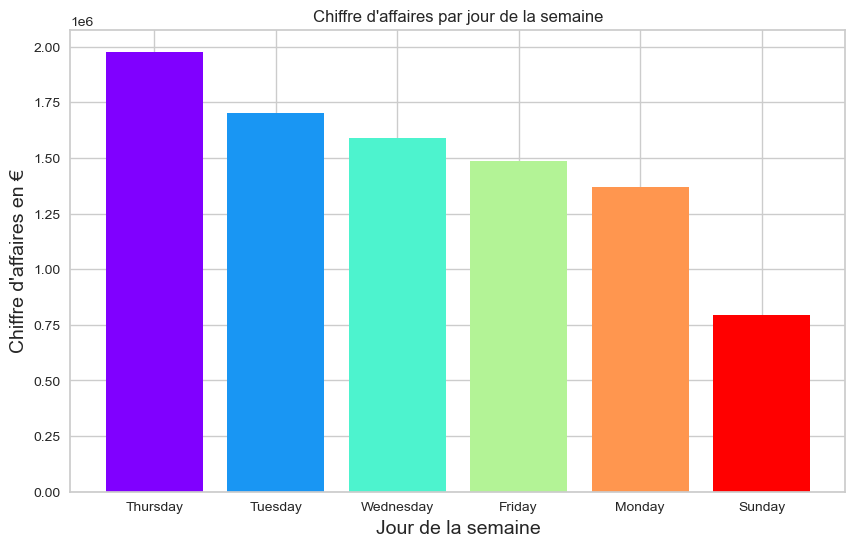

In [83]:
# Calcul du chiffre d'affaires par jour de la semaine
Revenue_semaine = data.groupby(data["Date"].dt.day_name())["Revenue"].sum()

# Trier les jours par chiffre d'affaires décroissant
Revenue_semaine = Revenue_semaine.sort_values(ascending=False)

# Visualisation par semaine
cmap = get_cmap("rainbow")
colors = cmap(np.linspace(0, 1, len(Revenue_semaine)))

plt.figure(figsize=(10, 6))
plt.bar(Revenue_semaine.index, Revenue_semaine.values, color=colors)
plt.xlabel("Jour de la semaine", fontsize=14)
plt.ylabel("Chiffre d'affaires en €", fontsize=14)
plt.title("Chiffre d'affaires par jour de la semaine")
plt.show()

Le jeudi semble être le jour avec le plus de CA.

#### 2.3.4 Chiffre d’affaires par pays <a class="anchor" id="section_2_3_4"></a>

Pour mieux visualiser les pays avec un chiffre d'affaires plus faible, on utilise une échelle logarithmique sur l'axe des y. Cela permettra de mieux mettre en valeur les différences entre les pays avec des chiffres d'affaires plus faibles.

             Pays  Chiffre d'affaires (€)
0  United Kingdom             7308391.554
1     Netherlands              285446.340
2            EIRE              265545.900
3         Germany              228867.140
4          France              209024.050
5       Australia              138521.310
6           Spain               61577.110
7     Switzerland               56443.950
8         Belgium               41196.340
9          Sweden               38378.330


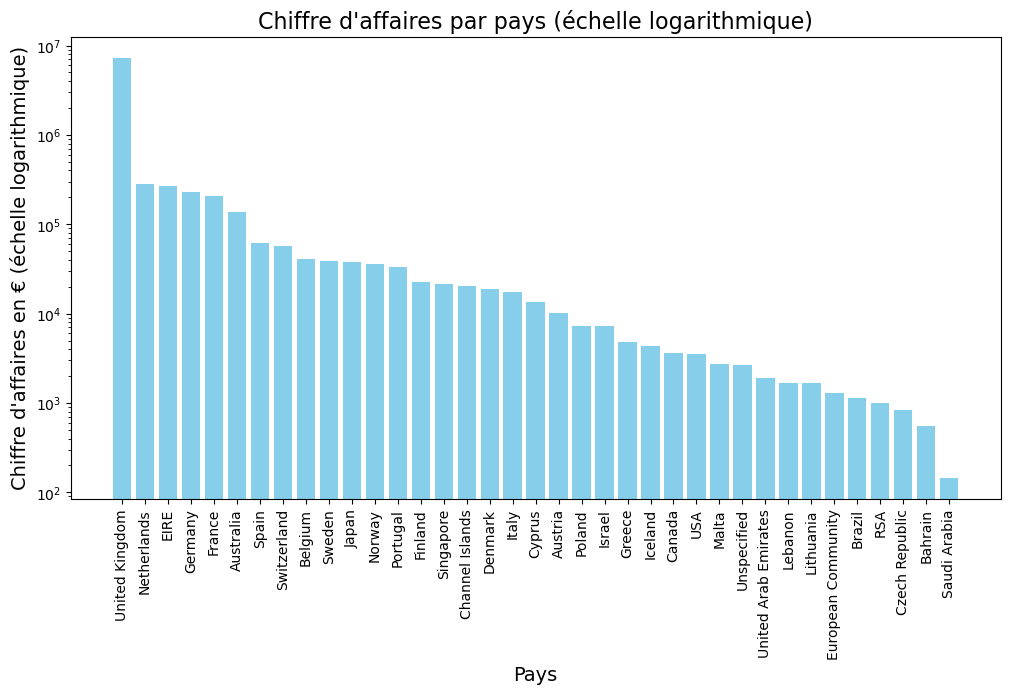

In [42]:
# Calcul du chiffre d'affaires par pays
CA_par_pays = data.groupby("Country")["Revenue"].sum()

# Trier les pays par chiffre d'affaires décroissant
CA_par_pays = CA_par_pays.sort_values(ascending=False)

# Sélection des dix premiers pays
top_10_pays = CA_par_pays.head(10)

# Création d'un DataFrame
tableau_CA = pd.DataFrame(
    {"Pays": top_10_pays.index, "Chiffre d'affaires (€)": top_10_pays.values}
)

# Affichage du joli tableau
print(tableau_CA)

# Création du graphique avec échelle logarithmique
plt.figure(figsize=(12, 6))
plt.bar(CA_par_pays.index, CA_par_pays, color="skyblue")
plt.xlabel("Pays", fontsize=14)
plt.xticks(rotation=90)
plt.ylabel("Chiffre d'affaires en € (échelle logarithmique)", fontsize=14)
plt.yscale("log")  # Utilisation d'une échelle logarithmique
plt.title("Chiffre d'affaires par pays (échelle logarithmique)", fontsize=16)
plt.show()

#### 2.3.5 Répartition du CA entre les clients <a class="anchor" id="section_2_3_5"></a>

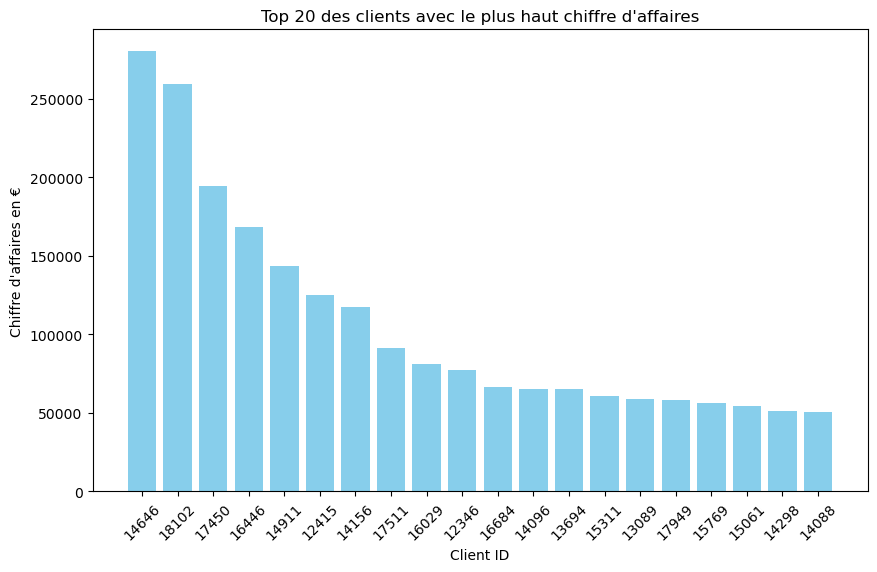

In [43]:
# Regroupement du CA par client_id
CA_client = data.groupby("CustomerID")["Revenue"].sum().reset_index()

# Tri des clients par chiffre d'affaires décroissant
CA_client = CA_client.sort_values(by="Revenue", ascending=False)

# Sélection des 20 premiers clients avec le CA le plus élevé
top_20_clients = CA_client.head(20)

# Création du graphique
plt.figure(figsize=(10, 6))
plt.bar(
    top_20_clients["CustomerID"].astype(str), top_20_clients["Revenue"], color="skyblue"
)
plt.xlabel("Client ID")
plt.ylabel("Chiffre d'affaires en €")
plt.title("Top 20 des clients avec le plus haut chiffre d'affaires")
plt.xticks(rotation=45)
plt.show()

#### Répartition du chiffre d'affaires entre les clients: Courbe de Lorrentz¶

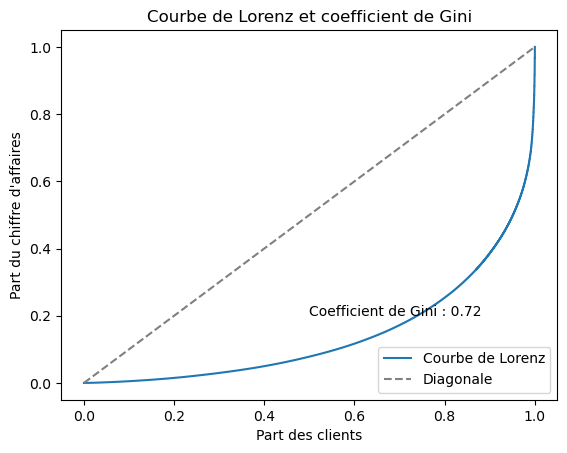

In [44]:
CA_clients = data.groupby("CustomerID")["Revenue"].sum()
n = len(CA_clients)

# Tri des valeurs de CA par ordre croissant
CA_clients_sorted = np.sort(CA_clients)

# Calcul de la courbe de Lorenz
lorenz = np.cumsum(CA_clients_sorted) / np.sum(CA_clients_sorted)

# Ajout du point (0, 0) pour obtenir une courbe fermée
lorenz = np.append([0], lorenz)

# Calcul du coefficient de Gini
AUC = np.trapz(lorenz, dx=1.0 / n)
S = 0.5 - AUC
gini = 2 * S

# Affichage de la courbe de Lorenz et du coefficient de Gini
fig, ax = plt.subplots()
ax.plot(
    np.linspace(0, 1, n + 1), lorenz, drawstyle="steps-post", label="Courbe de Lorenz"
)
ax.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Diagonale")

ax.legend(loc="lower right")
plt.title("Courbe de Lorenz et coefficient de Gini")
plt.xlabel("Part des clients")
plt.ylabel("Part du chiffre d'affaires")
plt.text(0.5, 0.2, f"Coefficient de Gini : {gini:.2f}")

plt.savefig("lorrentz.png")
plt.show()

Un coefficient de Gini de 0.72 indique une inégalité relativement élevée dans la distribution du chiffre d'affaires. Cela signifie qu'une petite fraction des clients génère la majorité du chiffre d'affaires, ce qui suggère une concentration importante de revenus entre un petit nombre de clients. 

In [45]:
# Calcul du chiffre d'affaires total
CA_total = data["Revenue"].sum()

# Création d'une liste pour les différents niveaux de "top clients"
top_clients_levels = [20, 50, 100]

# Initialisation d'une liste pour stocker les résultats
resultats = []

for niveau in top_clients_levels:
    # Sélection des clients pour le niveau donné
    top_clients = CA_client.head(niveau)
    
    # Calcul du chiffre d'affaires pour ce groupe de clients
    CA_top_clients = top_clients["Revenue"].sum()
    
    # Calcul du pourcentage du CA généré par ce groupe de clients
    pourcentage_CA = (CA_top_clients / CA_total) * 100
    
    # Calcul du pourcentage des clients représentés
    pourcentage_clients = (niveau / len(CA_client)) * 100
    
    # Ajout des résultats à la liste
    resultats.append([niveau, CA_top_clients, pourcentage_CA, pourcentage_clients])

# Création d'un DataFrame à partir des résultats
import pandas as pd
resultats_df = pd.DataFrame(resultats, columns=["Nombre de Clients", "Chiffre d'Affaires (€)", "% du CA Total", "% des Clients"])

# Affichage du DataFrame
print(resultats_df)


   Nombre de Clients  Chiffre d'Affaires (€)  % du CA Total  % des Clients
0                 20              2126044.80      23.857564       0.461042
1                 50              2961479.40      33.232453       1.152605
2                100              3612309.06      40.535784       2.305210


On voit cette inégalité sur ce tableau: le top 100 des clients qui représente 2.3 % des clients génère 40.5 % du CA.

### 2.4 Etude du panier moyen <a class="anchor" id="section_2_4"></a>

### 2.4.1 Etude de la taille et du prix du panier moyen <a class="anchor" id="section_2_4_1"></a>

In [46]:
# Regroupement des achats par facture
invoice_grouped = (
    data.groupby("InvoiceNo")
    .agg(
        {
            "CustomerID": "first",
            "Date": "first",
            "Quantity": "sum",
            "Revenue": "sum",
            "Country": "first",
        }
    )
    .reset_index()
)

# Calcul des métriques
panier_moyen = invoice_grouped.groupby(by=["CustomerID"], as_index=False).agg(
    {
        "InvoiceNo": "nunique",
        "Revenue": ["sum", "mean"],
        "Quantity": ["sum", "mean"],
        "Country": "first",
        "Date": "first",
    }
)

# Renommer les colonnes
panier_moyen.columns = [
    "CustomerID",
    "InvoiceNo",
    "Total Revenue",
    "Mean Revenue",
    "Total Quantity",
    "Mean Quantity",
    "Country",
    "Date",
]

panier_moyen = panier_moyen.sort_values(by="Mean Revenue", ascending=False)
panier_moyen

CustomerID  InvoiceNo  Total Revenue  Mean Revenue  Total Quantity  \
3008       16446          2      168472.50  84236.250000           80997   
0          12346          1       77183.60  77183.600000           74215   
2502       15749          3       44534.30  14844.766667           18028   
2011       15098          3       39916.50  13305.500000             121   
10         12357          1        6207.67   6207.670000            2708   
...          ...        ...            ...           ...             ...   
4155       18037          6          70.02     11.670000              20   
3995       17816          4          36.56      9.140000              30   
1793       14792          1           6.20      6.200000               2   
3217       16738          1           3.75      3.750000               3   
3014       16454          2           6.90      3.450000               3   

      Mean Quantity         Country       Date  
3008   40498.500000  United Kingdom 2011-05-18  
0      74215.000000  United Kingdom 2011-01-18  
2502    6009.333333  United Kingdom 2011-01-11  
2011      40.333333  United Kingdom 2011-06-10  
10      2708.000000     Switzerland 2011-11-06  
...             ...             ...        ...  
4155       3.333333  United Kingdom 2010-12-12  
3995       7.500000  United Kingdom 2010-12-09  
1793       2.000000  United Kingdom 2011-10-07  
3217       3.000000  United Kingdom 2011-02-15  
3014       1.500000  United Kingdom 2011-10-06  

[4338 rows x 8 columns]

In [47]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Création du boxplot avec Plotly pour la Taille du Panier
fig1 = go.Figure()
fig1.add_trace(
    go.Box(
        y=panier_moyen["Mean Quantity"],
        name="Taille du Panier moyen",
        marker_color="skyblue",
    )
)
fig1.update_layout(
    title="Distribution de la Taille du Panier moyen", yaxis=dict(title="Valeurs")
)

# Création du boxplot avec Plotly pour le Prix du Panier
fig2 = go.Figure()
fig2.add_trace(
    go.Box(
        y=panier_moyen["Mean Revenue"],
        name="Prix du Panier moyen",
        marker_color="orange",
    )
)
fig2.update_layout(
    title="Distribution du Prix du Panier moyen", yaxis=dict(title="Valeurs")
)

# Création de la grille
fig = make_subplots(
    rows=1, cols=2, subplot_titles=("Taille du Panier moyen", "Prix du Panier moyen")
)

# Ajout des graphiques à la grille
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)

# Mise en forme du layout
fig.update_layout(showlegend=False)

# Affichage de la grille
fig.show()

CustomerID: 12346 et 16446 sont les 2 clients que l'ont voit se détacher nettement.

### 2.4.2 Etude du panier moyen par pays <a class="anchor" id="section_2_4_2"></a>

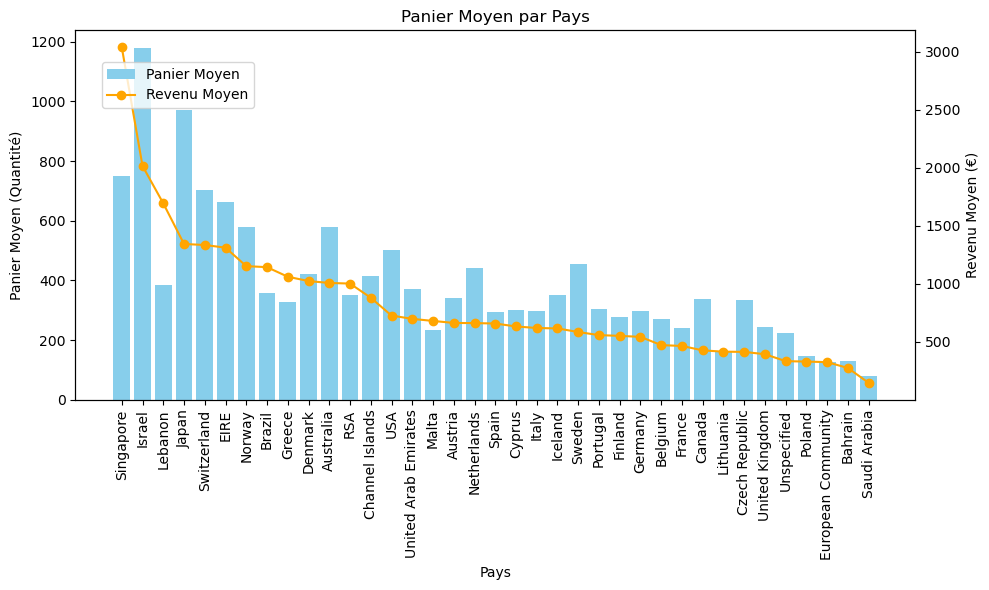

In [48]:
# Calcul des métriques par pays
panier_moyen_pays = (
    panier_moyen.groupby("Country")
    .agg({"Mean Quantity": "mean", "Mean Revenue": "mean"})
    .reset_index()
)

# Trier par revenu moyen (en ordre décroissant)
panier_moyen_pays = panier_moyen_pays.sort_values(by="Mean Revenue", ascending=False)

# Création de la visualisation
fig, ax = plt.subplots(figsize=(10, 6))

# Barres pour le panier moyen
ax.bar(
    panier_moyen_pays["Country"],
    panier_moyen_pays["Mean Quantity"],
    label="Panier Moyen",
    color="skyblue",
)
ax.set_xlabel("Pays")
ax.set_ylabel("Panier Moyen (Quantité)")
ax.set_title("Panier Moyen par Pays")

# Rotation des labels
plt.xticks(panier_moyen_pays["Country"], rotation=90)

# Deuxième axe pour le revenu moyen
ax2 = ax.twinx()
ax2.plot(
    panier_moyen_pays["Country"],
    panier_moyen_pays["Mean Revenue"],
    color="orange",
    marker="o",
    label="Revenu Moyen",
)
ax2.set_ylabel("Revenu Moyen (€)")

# Afficher la légende
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Afficher le graphique
plt.show()

## 3 RFM Analysis and Segmenting <a class="anchor" id="chapter3"></a>

RFM  est une méthode utilisée pour analyser la valeur d'un client et segmenter la base de clients. C'est un acronyme qui signifie :

Recency, Récence (R) : Une valeur de récence plus faible signifie que le client a acheté plus récemment, ce qui indique un engagement plus élevé envers la marque.

Frequency, Fréquence (F) : Cette métrique indique à quelle fréquence un client effectue un achat dans une certaine période. Une valeur de fréquence plus élevée indique un client qui interagit plus souvent avec l'entreprise, suggérant une plus grande fidélité ou satisfaction.

Monetary, Montant (M) : Cette métrique représente le montant total d'argent qu'un client a dépensé sur une certaine période. Les clients qui ont une valeur monétaire plus élevée ont contribué davantage à l'entreprise, indiquant leur potentiel de valeur à vie élevée.

Ensemble, ces métriques aident à comprendre le comportement d'achat et les préférences d'un client, ce qui est essentiel pour personnaliser les stratégies marketing et créer un système de recommandation.

### 3.1 RFM <a class="anchor" id="section_3_1"></a>

In [49]:
print(data["InvoiceDate"].max())

2011-12-09 12:50:00


In [50]:
data2 = data.copy()

# Amount
Monetary = data2.groupby("CustomerID")["Revenue"].sum()
Monetary = Monetary.reset_index()
Monetary.columns = ["CustomerID", "Monetary"]

# frequency
Frequency = data2.groupby("CustomerID")["InvoiceNo"].count()
Frequency = Frequency.reset_index()
Frequency.columns = ["CustomerID", "Frequency"]

# Calculer la date la plus récente pour chaque client
latest_purchase_date = data2.groupby("CustomerID")["InvoiceDate"].max()

# Définir la date de référence
# Set the reference date
today_date = dt.datetime(2011, 12, 10)

# Calculer la récence en jours
recency = (today_date - latest_purchase_date).dt.days

# Créer un DataFrame pour la récence
Recency = recency.reset_index()
Recency.columns = ["CustomerID", "Recency"]

# merge both df
rfm = pd.merge(Monetary, Frequency, on="CustomerID", how="inner")
rfm = pd.merge(rfm, Recency, on="CustomerID", how="inner")
rfm.head()

rfm.sort_values(by="Monetary", ascending=False)

CustomerID   Monetary  Frequency  Recency
1689       14646  280206.02       2076        1
4201       18102  259657.30        431        0
3728       17450  194550.79        337        8
3008       16446  168472.50          3        0
1879       14911  143825.06       5675        1
...          ...        ...        ...      ...
3323       16878      13.30          3       84
4098       17956      12.75          1      249
3014       16454       6.90          2       44
1793       14792       6.20          2       63
3217       16738       3.75          1      297

[4338 rows x 4 columns]

**Heatmap de Corrélation RFM:**

In [51]:
# Calculer la corrélation
corr = rfm.corr()

# Créer le heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heatmap de Corrélation des Métriques RFM")
plt.show()

On observe une corrélation moyenne de 0.42 entre Frequency et Monetary. 
Cela suggère qu'il existe une relation positive entre la fréquence d'achat et le montant dépensé, ce qui signifie que les clients qui achètent plus souvent ont tendance à dépenser d'avantage.

**Histogrammes et Boxplots :**

Nous allons créer des histogrammes pour chaque métrique RFM pour visualiser leur distribution. Les boxplots peuvent également être utiles pour identifier les valeurs aberrantes.

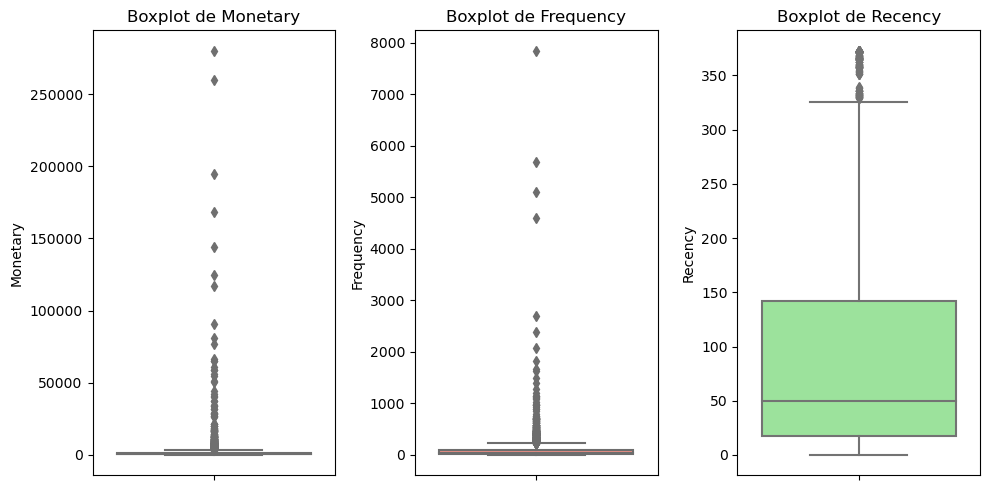

In [52]:
# Histogrammes
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(rfm['Monetary'], bins=80, color='skyblue', edgecolor='black')
plt.xlabel('Monetary')
plt.title('Histogramme de Monetary')
plt.xlim(0, 30000)

plt.subplot(1, 3, 2)
plt.hist(rfm['Frequency'], bins=80, color='salmon', edgecolor='black')
plt.xlabel('Frequency')
plt.title('Histogramme de Frequency')
plt.xlim(0, 2000)

plt.subplot(1, 3, 3)
plt.hist(rfm['Recency'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Recency')
plt.title('Histogramme de Recency')

plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=rfm['Monetary'], color='skyblue')
plt.title('Boxplot de Monetary')

plt.subplot(1, 3, 2)
sns.boxplot(y=rfm['Frequency'], color='salmon')
plt.title('Boxplot de Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(y=rfm['Recency'], color='lightgreen')
plt.title('Boxplot de Recency')

plt.tight_layout()
plt.show()


Nous observons des outliers particulièrement pour Monetary et Frequency.

### 3.2 Traitement des Outliers <a class="anchor" id="section_3_2"></a>

Sélection du modèle de détection des valeurs aberrantes :
- La distribution n'est pas normale.
- La distribution est fortement asymétrique.
- Nous avons des valeurs aberrantes importantes.

Isolation Forest ne suppose pas de distribution normale et est capable de détecter les valeurs aberrantes à un niveau multidimensionnel.
L'Isolation Forest est un algorithme d'apprentissage automatique basé sur les arbres de décision qui est spécialement conçu pour détecter les anomalies dans les ensembles de données.
L'algorithme repose sur le principe que les anomalies sont des observations rares et différentes, ce qui devrait les rendre plus faciles à identifier.

**Recherche d'hyperparamètres**

In [53]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV

df2 = rfm.copy()

# Définition des hyperparamètres à rechercher
param_grid = {
    "n_estimators": [100, 150, 200],
    "max_samples": ["auto", 0.5],
    "contamination": [0.05, 0.1, 0.2],
}

# Création de l'instance de l'Isolation Forest
clf = IsolationForest(random_state=42)

# Création de l'objet GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring="neg_mean_squared_error")

# Sélection des colonnes à utiliser pour la détection des anomalies (Monetary, Frequency, Recency)
X = df2[["Monetary", "Frequency", "Recency"]]

# Entraînement du modèle avec Grid Search
grid_search.fit(X)

# Affichage des meilleurs paramètres
print("Meilleurs paramètres trouvés :")
print(grid_search.best_params_)

Meilleurs paramètres trouvés :
{'contamination': 0.05, 'max_samples': 'auto', 'n_estimators': 100}


Total number of outliers is: 217


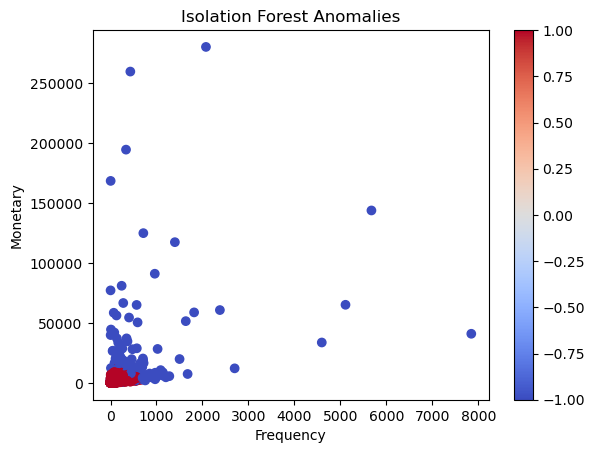

In [54]:
from sklearn.ensemble import IsolationForest

# Sélection des colonnes à utiliser pour la détection des anomalies (Monetary, Frequency, Recency)
X = df2[["Monetary", "Frequency", "Recency"]]

# Création de l'instance de l'Isolation Forest avec les meilleurs paramètres
clf = IsolationForest(
    n_estimators=100, max_samples="auto", contamination=0.05, random_state=42
)

# Entraînement du modèle
clf.fit(X)

# Ajout des scores et des étiquettes d'anomalie à df2
scores = clf.decision_function(X)
anomaly = clf.predict(X)

df2["scores"] = scores
df2["anomaly"] = anomaly

# Afficher les indices des anomalies
anomaly = df2.loc[df2["anomaly"] == -1]
anomaly_index = list(anomaly.index)
print("Total number of outliers is:", len(anomaly))

# Visualisation des anomalies
plt.scatter(df2["Frequency"], df2["Monetary"], c=df2["anomaly"], cmap="coolwarm")
plt.xlabel("Frequency")
plt.ylabel("Monetary")
plt.title("Isolation Forest Anomalies")
plt.colorbar()
plt.show()

In [55]:
# Suppression des observations contenant des outliers
rfm_cleaned = rfm.drop(anomaly_index)
rfm_kmeans = rfm_cleaned.copy()

# Vérification du nombre d'outliers supprimés
print(f"Nombre d'outliers supprimés : {len(anomaly_index)}")

# Vérification de la nouvelle taille du DataFrame
print(f"Taille du DataFrame après suppression des outliers : {rfm_cleaned.shape}")

Nombre d'outliers supprimés : 217
Taille du DataFrame après suppression des outliers : (4121, 4)


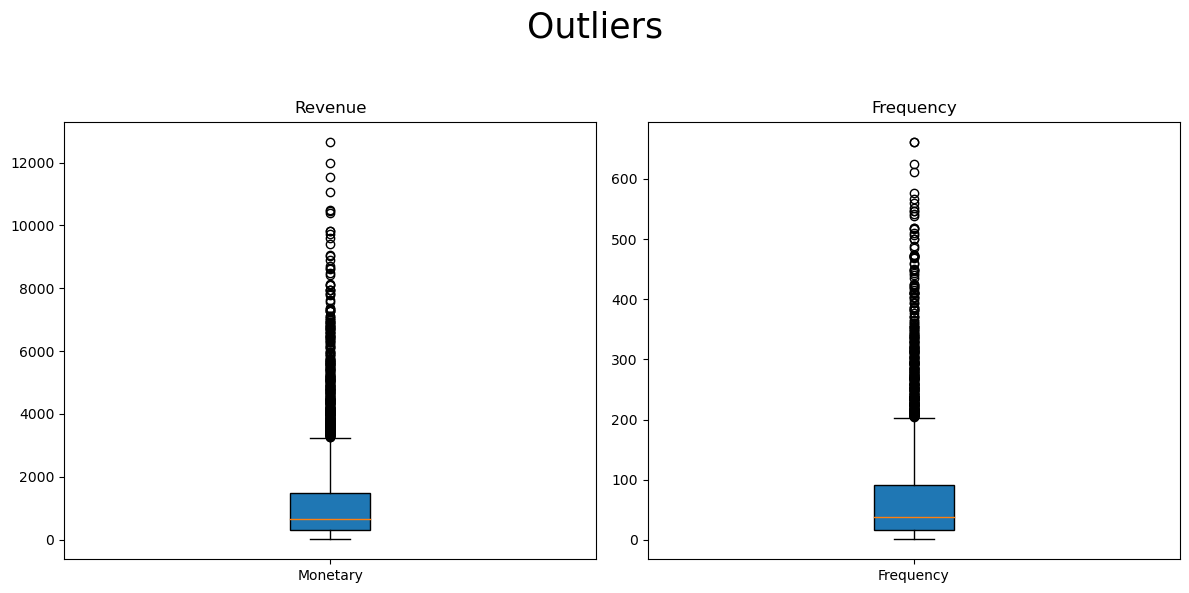

In [56]:
fig, axes = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 6)
)  # J'ai ajusté la taille de la figure

fig.suptitle("Outliers\n", size=25)

# Utilisation de plt.boxplot pour créer les graphiques en boîte
axes[0].boxplot(rfm_cleaned["Monetary"], patch_artist=True, labels=["Monetary"])
axes[0].set_title("Revenue")

axes[1].boxplot(rfm_cleaned["Frequency"], patch_artist=True, labels=["Frequency"])
axes[1].set_title("Frequency")

plt.tight_layout()
plt.show()

Nous pouvons voir que l'algorithme Isolation Forest a bien fonctionné.

### 3.3 Analyse RFM et Segmenation clients<a class="anchor" id="section_3_3"></a>

#### 3.3.1 RFM Scores <a class="anchor" id="section_3_3_1"></a>

In [57]:
def get_rfm_scores(dataframe) -> pd.core.frame.DataFrame:

    df_ = dataframe.copy()
    df_["recency_score"] = pd.qcut(df_["Recency"], 5, labels=[5, 4, 3, 2, 1])
    df_["frequency_score"] = pd.qcut(
        df_["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5]
    )
    df_["monetary_score"] = pd.qcut(df_["Monetary"], 5, labels=[1, 2, 3, 4, 5])
    df_["RFM_score1"] = df_["recency_score"].astype(str) + df_["frequency_score"].astype(str) + df_["monetary_score"].astype(str)
    df_["RFM_score2"] = df_[['recency_score','frequency_score','monetary_score']].sum(axis=1)

    return df_


rfm = get_rfm_scores(rfm_cleaned)

In [58]:
rfm

CustomerID  Monetary  Frequency  Recency recency_score frequency_score  \
1          12347   4310.00        182        2             5               5   
2          12348   1797.24         31       75             2               3   
3          12349   1757.55         73       18             4               4   
4          12350    334.40         17      310             1               2   
5          12352   2506.04         85       36             3               4   
...          ...       ...        ...      ...           ...             ...   
4332       18278    173.90          9       73             2               1   
4333       18280    180.60         10      277             1               1   
4334       18281     80.82          7      180             1               1   
4335       18282    178.05         12        7             5               1   
4337       18287   1837.28         70       42             3               4   

     monetary_score RFM_score1  RFM_score2  
1                 5        555          15  
2                 4        234           9  
3                 4        444          12  
4                 2        122           5  
5                 5        345          12  
...             ...        ...         ...  
4332              1        211           4  
4333              1        111           3  
4334              1        111           3  
4335              1        511           7  
4337              5        345          12  

[4121 rows x 9 columns]

#### 3.3.2 Segmentation Clients <a class="anchor" id="section_3_3_2"></a>

In [59]:
def segment_customers_with_custom_categories(df):
    # Créer une colonne 'RFM_segment' pour stocker les segments
    df['RFM_Segment'] = ''

    # Convertir RFM_SCORE en chaînes de caractères
    df['RFM_SCORE'] = df['RFM_score1'].astype(str)

    # Définir les catégories RFM et les étiquettes de segment correspondantes
    seg_map = {
        r"[1-2][1-2][1-2]": "hibernating",
        r"[1-2][1-2][3-5]": "at_Risk",
        r"[1-2][3-5][1-5]": "cant_loose",
        r"3[1-2][1-2]": "about_to_sleep",
        r"3[1-2]3": "need_attention",
        r"[3-4][3-5][3-5]": "loyal_customers",
        r"[4-5][1-5][1-5]": "promising",
        r"5[1-5][1-5]": "new_customers",
        r"[4-5][2-3][1-5]": "potential_loyalists",
        r"5[4-5][1-5]": "champions"
    }

    # Parcourir chaque segment dans le seg_map
    for pattern, segment_label in seg_map.items():
        # Utiliser une expression régulière pour trouver les correspondances
        df.loc[df['RFM_SCORE'].str.match(pattern), 'RFM_Segment'] = segment_label

    return df

# Appeler la fonction pour segmenter les clients avec les catégories RFM personnalisées
rfm_segmented = segment_customers_with_custom_categories(rfm)

In [60]:
rfm_segmented

CustomerID  Monetary  Frequency  Recency recency_score frequency_score  \
1          12347   4310.00        182        2             5               5   
2          12348   1797.24         31       75             2               3   
3          12349   1757.55         73       18             4               4   
4          12350    334.40         17      310             1               2   
5          12352   2506.04         85       36             3               4   
...          ...       ...        ...      ...           ...             ...   
4332       18278    173.90          9       73             2               1   
4333       18280    180.60         10      277             1               1   
4334       18281     80.82          7      180             1               1   
4335       18282    178.05         12        7             5               1   
4337       18287   1837.28         70       42             3               4   

     monetary_score RFM_score1  RFM_score2      RFM_Segment RFM_SCORE  
1                 5        555          15        champions       555  
2                 4        234           9       cant_loose       234  
3                 4        444          12        promising       444  
4                 2        122           5      hibernating       122  
5                 5        345          12  loyal_customers       345  
...             ...        ...         ...              ...       ...  
4332              1        211           4      hibernating       211  
4333              1        111           3      hibernating       111  
4334              1        111           3      hibernating       111  
4335              1        511           7    new_customers       511  
4337              5        345          12  loyal_customers       345  

[4121 rows x 11 columns]

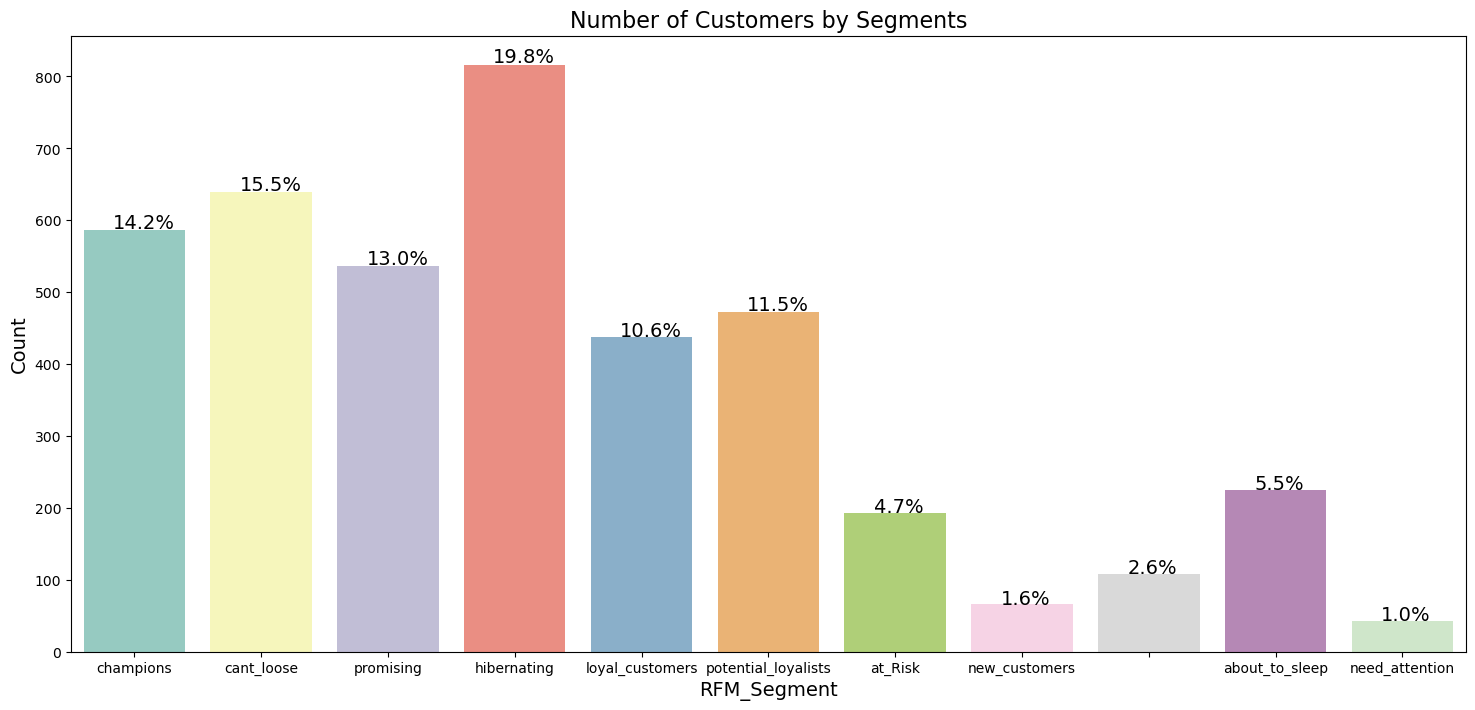

In [61]:
# Définir une palette de couleurs
palette = sns.color_palette("Set3", n_colors=len(rfm_segmented['RFM_Segment'].unique()))

# Utiliser la palette dans le countplot
plt.figure(figsize=(18, 8))
ax = sns.countplot(data=rfm_segmented, x="RFM_Segment", palette=palette)

# Ajouter les pourcentages au-dessus des barres
total = len(rfm_segmented.RFM_Segment)
for patch in ax.patches:
    percentage = "{:.1f}%".format(100 * patch.get_height() / total)
    x = patch.get_x() + patch.get_width() / 2 - 0.17
    y = patch.get_y() + patch.get_height() * 1.005
    ax.annotate(percentage, (x, y), size=14)

plt.title("Number of Customers by Segments", size=16)
plt.xlabel("RFM_Segment", size=14)
plt.ylabel("Count", size=14)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [62]:
# Vérifier les valeurs nulles dans la colonne 'RFM_Segment'
nombre_valeurs_nulles = rfm_segmented['RFM_Segment'].isnull().sum()

# Afficher le nombre de valeurs nulles
print("Nombre de valeurs nulles dans la colonne 'RFM_Segment':", nombre_valeurs_nulles)

Nombre de valeurs nulles dans la colonne 'RFM_Segment': 0


#### Segmentation Map

Text(0.5, 1.0, 'Répartition des clients par segment')

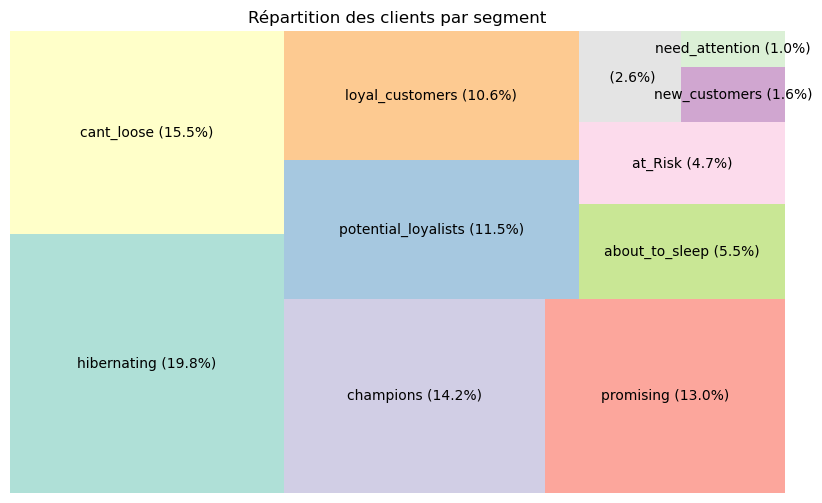

In [63]:
import squarify

# Compter le nombre de clients dans chaque segment
segment_counts = rfm_segmented["RFM_Segment"].value_counts()

# Calculer les pourcentages
segment_percentages = (segment_counts / segment_counts.sum()) * 100

# Créer le diagramme squarify avec les pourcentages
plt.figure(figsize=(10, 6))
squarify.plot(
    sizes=segment_counts.values,
    label=[
        f"{seg} ({percent:.1f}%)"
        for seg, percent in zip(segment_counts.index, segment_percentages)
    ],
    color=palette,
    alpha=0.7,
)
plt.title("Customer Segmentation Map", fontsize=20)
plt.axis("off")
plt.title("Répartition des clients par segment")

#### Model Evaluation

In [64]:
print(" RFM Model Evaluation ".center(70, "="))
X = rfm_segmented[["recency_score", "frequency_score"]]
labels = rfm_segmented["RFM_Segment"]
print(f"Number of Observations: {X.shape[0]}")
print(f"Number of Segments: {labels.nunique()}")
print(f"Silhouette Score: {round(silhouette_score(X, labels), 3)}")
print(f"Calinski Harabasz Score: {round(calinski_harabasz_score(X, labels), 3)}")
print(f'Davies Bouldin Score: {round(davies_bouldin_score(X, labels), 3)} \n{70*"="}')

======================== RFM Model Evaluation ========================
Number of Observations: 4121
Number of Segments: 11
Silhouette Score: 0.235
Calinski Harabasz Score: 2061.583
Davies Bouldin Score: 2.207 


Un score de silhouette de 0.46 est considéré comme relativement bon, indiquant que les clusters sont bien séparés. 

### Segment Analysis

In [65]:
rfm_segmented[["Recency", "Monetary", "Frequency", "RFM_Segment"]].groupby("RFM_Segment").agg(
    {"mean", "std", "max", "min"}
)

Recency                          Monetary               \
                           std        mean  max min          std         mean   
RFM_Segment                                                                     
                      9.573073   51.601852   71  35  1035.230108   675.864259   
about_to_sleep       10.764273   52.808889   71  35   117.537304   254.173022   
at_Risk              80.889285  168.409326  373  72   741.921897   907.771041   
cant_loose           74.074481  153.366197  373  72   908.185853  1018.612520   
champions             4.431506    6.617747   15   0  2067.218706  2732.678430   
hibernating          87.954915  218.580882  373  72   112.673244   228.067256   
loyal_customers      10.975558   51.118993   71  35  1207.505887  1631.207872   
need_attention       11.660669   53.069767   71  35   111.726514   607.991395   
new_customers         4.442851    8.212121   15   1   978.165934   460.511667   
potential_loyalists   9.487101   16.156780   33   0   898.309749   786.887820   
promising             5.294474   23.884328   33  16  1737.838186  1872.707743   

                                        Frequency                       
                          max     min         std        mean  max min  
RFM_Segment                                                             
                      7330.80   97.97   24.472624   42.314815  128   4  
about_to_sleep         460.40    6.20    7.194015   14.071111   28   1  
at_Risk               6912.00  463.95    8.538781   16.025907   28   1  
cant_loose            7829.89   67.23   40.336768   63.661972  281  28  
champions            12669.98  182.77  115.875986  177.046075  662  53  
hibernating            462.95    3.75    7.139934   12.227941   28   1  
loyal_customers       8099.49  473.03   72.437084   99.489703  506  28  
need_attention         841.08  463.80    8.333045   19.418605   28   1  
new_customers         6977.04   35.40    3.789724    7.287879   13   1  
potential_loyalists  11990.96   68.84   11.633878   32.358051   53  13  
promising            11528.48   20.80  101.269470  121.652985  624   1

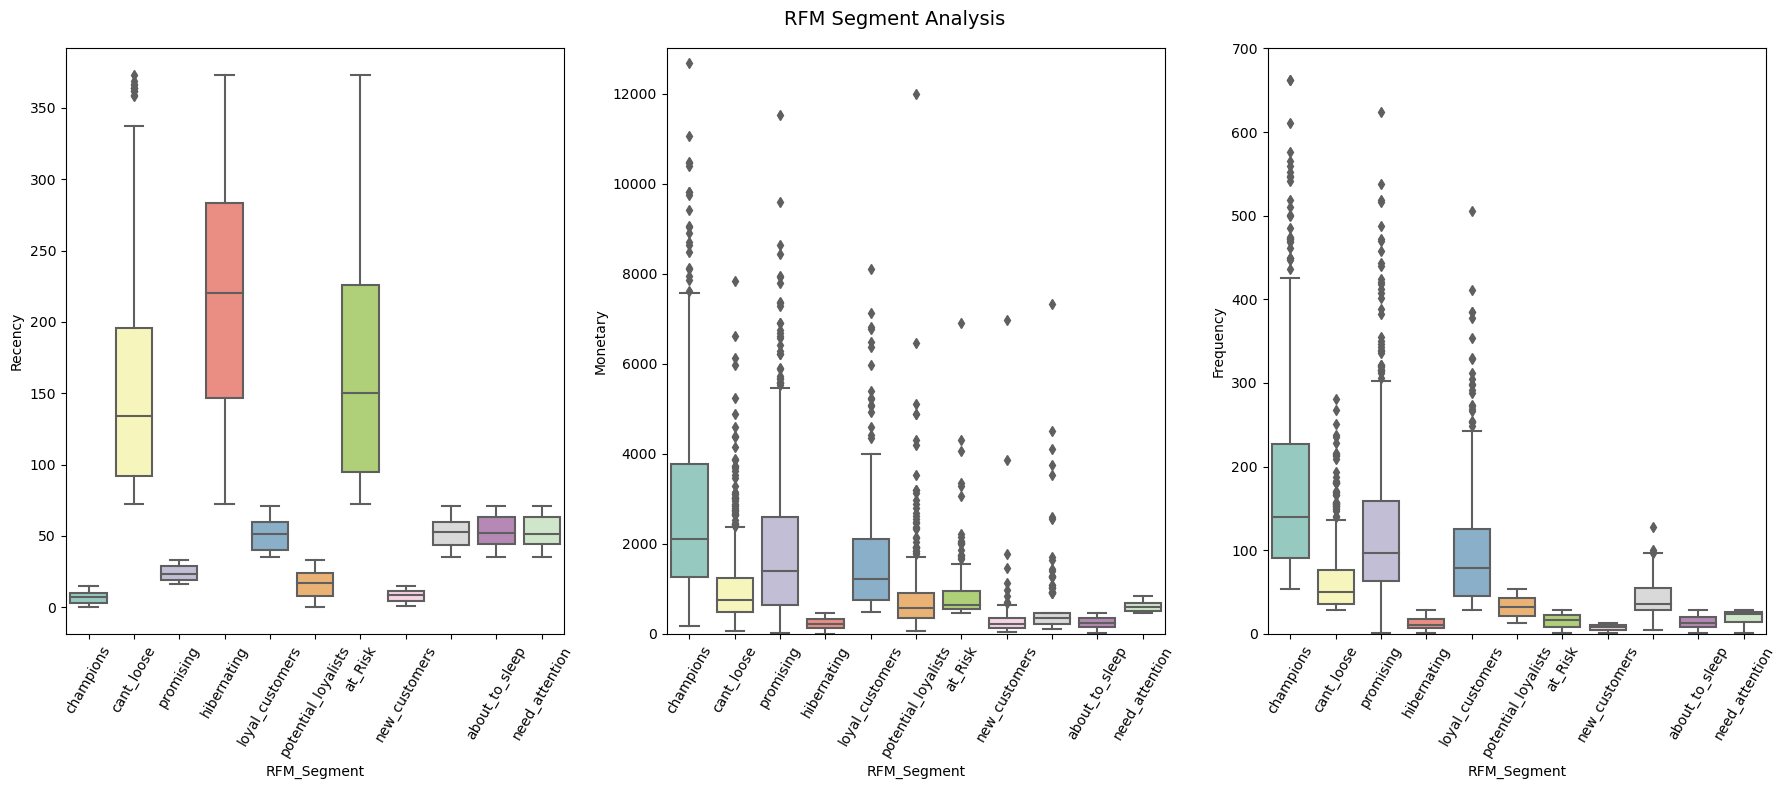

In [66]:
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
fig.suptitle("RFM Segment Analysis", size=14)
feature_list = ["Recency", "Monetary", "Frequency"]
for idx, col in enumerate(feature_list):
    sns.boxplot(
        ax=axes[idx], data=rfm_segmented, x="RFM_Segment", y=feature_list[idx], palette=palette
    )
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=60)
    if idx == 1:
        axes[idx].set_ylim([0, 13000])
    if idx == 2:
        axes[idx].set_ylim([0, 700])
plt.tight_layout()
plt.show()

In [67]:
plt.figure(figsize=(18, 8))

# Premier sous-tracé pour Recency & Frequency
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=rfm_segmented, x="Recency", y="Frequency", hue="RFM_Segment", palette=palette, s=60
)
plt.title("Recency & Frequency by Segments", size=16)
plt.xlabel("Recency", size=12)
plt.ylabel("Frequency", size=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.legend(loc="best", fontsize=12, title="Segments", title_fontsize=14)

# Deuxième sous-tracé pour Monetary & Frequency
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=rfm_segmented, x="Monetary", y="Frequency", hue="RFM_Segment", palette=palette, s=60
)
plt.title("Monetary & Frequency by Segments", size=16)
plt.xlabel("Monetary", size=12)
plt.ylabel("Frequency", size=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.legend(loc="best", fontsize=12, title="Segments", title_fontsize=14)

plt.tight_layout()
plt.show()

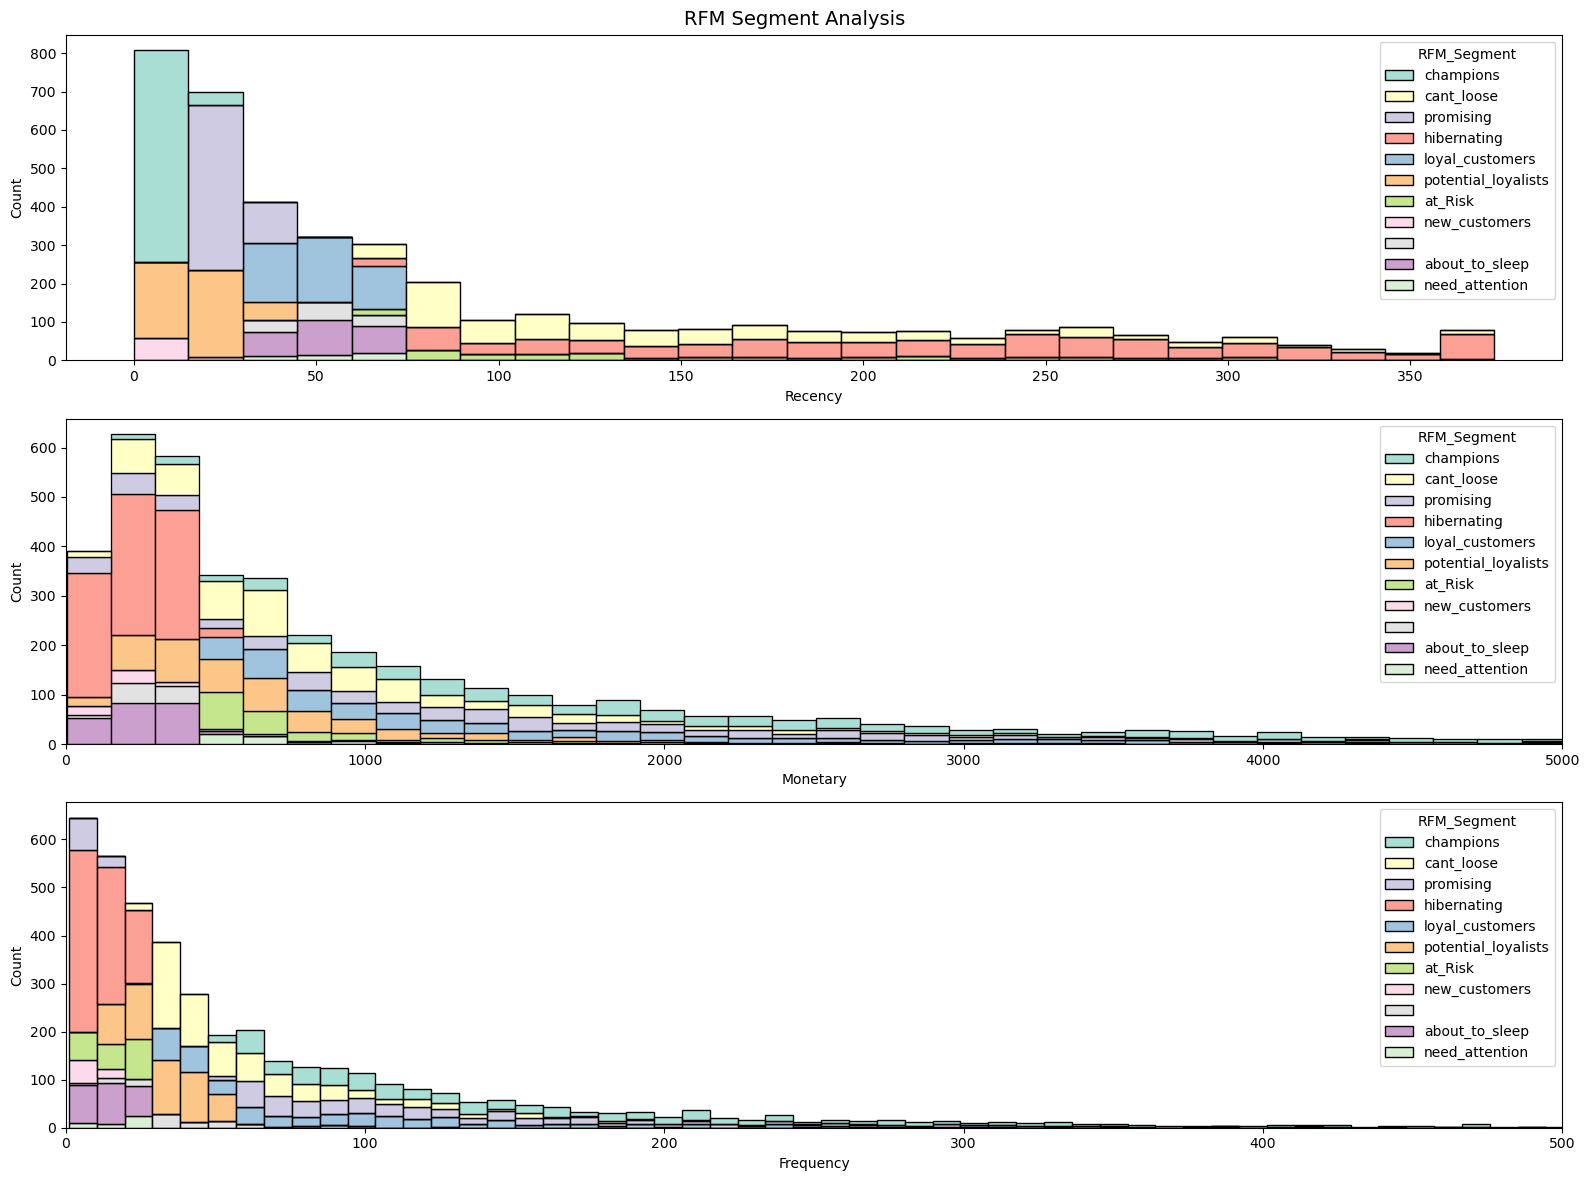

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Votre code pour obtenir rfm et palette

fig, axes = plt.subplots(3, 1, figsize=(16, 12))
fig.suptitle("RFM Segment Analysis", size=14)
feature_list = ["Recency", "Monetary", "Frequency"]
for idx, col in enumerate(feature_list):
    sns.histplot(
        ax=axes[idx],
        data=rfm_segmented,
        hue="RFM_Segment",
        x=feature_list[idx],
        palette=palette,
        multiple="stack",
    )
    if idx == 1:
        axes[idx].set_xlim([0, 5000])
    if idx == 2:
        axes[idx].set_xlim([0, 500])
plt.tight_layout()
plt.show()

### 3.4 Segmentation K-means <a class="anchor" id="section_3_4"></a>

Les algorithmes de classification ont été effectués sur des données standardisées. Cela garantit que les variables sont mises à la même échelle.

K-means est un algorithme de clustering non supervisé qui vise à diviser un ensemble de données en K groupes (ou clusters) distincts. Il fonctionne en itérant à travers les données et en assignant chaque point de données au cluster dont le centroïde (le centre du groupe) est le plus proche. Ensuite, il calcule un nouveau centroïde pour chaque cluster en prenant la moyenne des points de données qui lui sont attribués. Ce processus est répété jusqu'à ce que les centroïdes convergent vers une position stable.

#### 3.4.1 Scaling (Mise à l'échelle) <a class="anchor" id="section_3_4_1"></a>

Les données vont être standardisées, ce qui signifie qu'elles vont être centrées autour de zéro et mises à l'échelle de manière à avoir une moyenne de 0 et un écart type de 1 pour chaque variable. Cela permet de traiter les variables de manière équitable lors de l'analyse.

In [69]:
rfm_kmeans = rfm_cleaned.copy()

In [70]:
from sklearn.preprocessing import StandardScaler

# Sélectionner les colonnes à standardiser
columns_to_standardize = ['Monetary', 'Frequency', 'Recency']

# Créer un objet StandardScaler
scaler = StandardScaler()

# Appliquer la standardisation aux colonnes sélectionnées
rfm_kmeans[columns_to_standardize] = scaler.fit_transform(rfm_kmeans[columns_to_standardize])

In [71]:
rfm_kmeans

CustomerID  Monetary  Frequency   Recency
1          12347  2.134681   1.295562 -0.915807
2          12348  0.417566  -0.458880 -0.166231
3          12349  0.390444   0.029110 -0.751516
4          12350 -0.582077  -0.621543  2.246785
5          12352  0.901930   0.168536 -0.566690
...          ...       ...        ...       ...
4332       18278 -0.691756  -0.714494 -0.186768
4333       18280 -0.687177  -0.702875  1.907936
4334       18281 -0.755363  -0.737732  0.911925
4335       18282 -0.688920  -0.679638 -0.864466
4337       18287  0.444928  -0.005746 -0.505081

[4121 rows x 4 columns]

In [72]:
# Mettre CustomerID comme index
rfm_kmeans.set_index('CustomerID', inplace=True)
rfm_kmeans

Monetary  Frequency   Recency
CustomerID                               
12347       2.134681   1.295562 -0.915807
12348       0.417566  -0.458880 -0.166231
12349       0.390444   0.029110 -0.751516
12350      -0.582077  -0.621543  2.246785
12352       0.901930   0.168536 -0.566690
...              ...        ...       ...
18278      -0.691756  -0.714494 -0.186768
18280      -0.687177  -0.702875  1.907936
18281      -0.755363  -0.737732  0.911925
18282      -0.688920  -0.679638 -0.864466
18287       0.444928  -0.005746 -0.505081

[4121 rows x 3 columns]

#### 3.4.2 PCA <a class="anchor" id="section_3_4_2"></a>

In [73]:
# Assurez-vous d'importer PCA
from sklearn.decomposition import PCA

# Créez un objet PCA
pca = PCA()

# Appliquez l'ACP aux données standardisées
pca.fit(rfm_kmeans)

PCA()

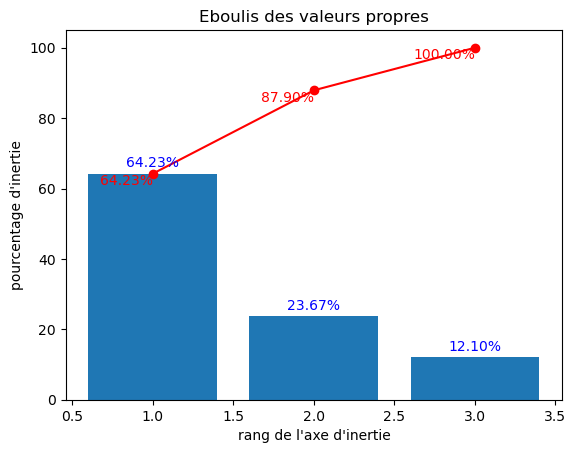

In [74]:
from Fonctions.pca import display_scree_plot
display_scree_plot(pca)

In [75]:
# importation des fonctions créées
from Fonctions.pca import correlation_graph
from Fonctions.pca import display_factorial_planes

In [76]:
#Calcul coordonnées des individus dans l'espace des composantes principales.
X_proj = pca.transform(rfm_kmeans)

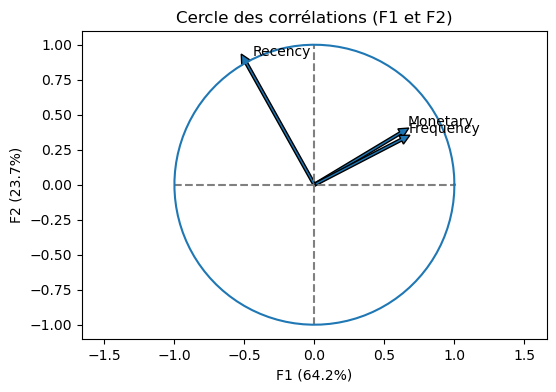

In [77]:
# Plan 1 et 2
x_y = (0, 1)

features = ['Monetary', 'Frequency', 'Recency']

# Plot the correlation graph in the first subplot
correlation_graph(pca, x_y, features)

#### 3.4.3 Évaluation du Nombre Optimal de Clusters et Coefficient de Silhouette  <a class="anchor" id="section_3_4_3"></a>

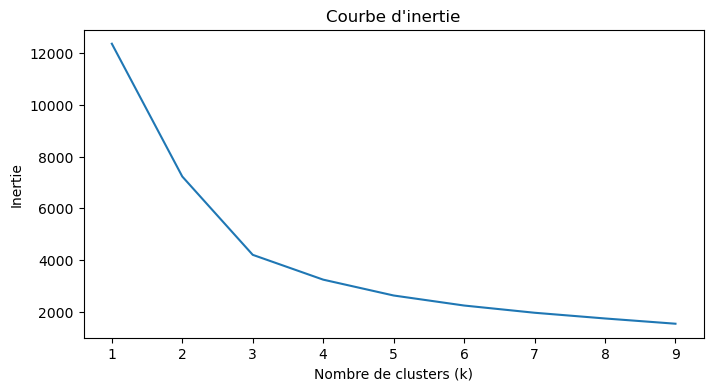

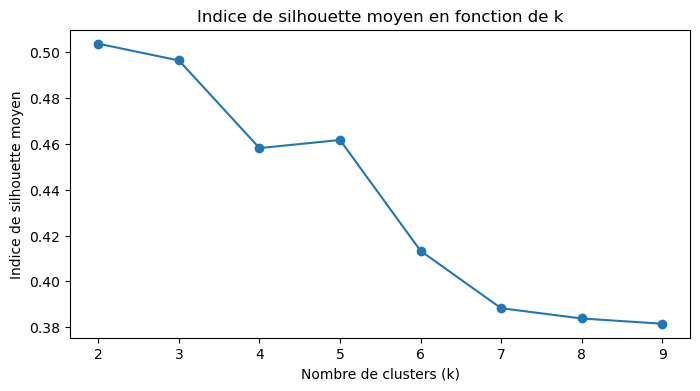

In [78]:
from sklearn.cluster import KMeans
from Fonctions.kmeans import plot_inertia,plot_silhouette_avg

# Utilisation des fonctions
plot_inertia(rfm_kmeans)
plot_silhouette_avg(rfm_kmeans)

Ici, il semble que 2 soit le nombre optimal de clusters. Cependant, en fonction des exigences de l'entreprise, nous pouvons choisir d'utiliser moins ou plus de clusters. Nous allons donc essayer notre analyse avec 3, 4 et 5 clusters.

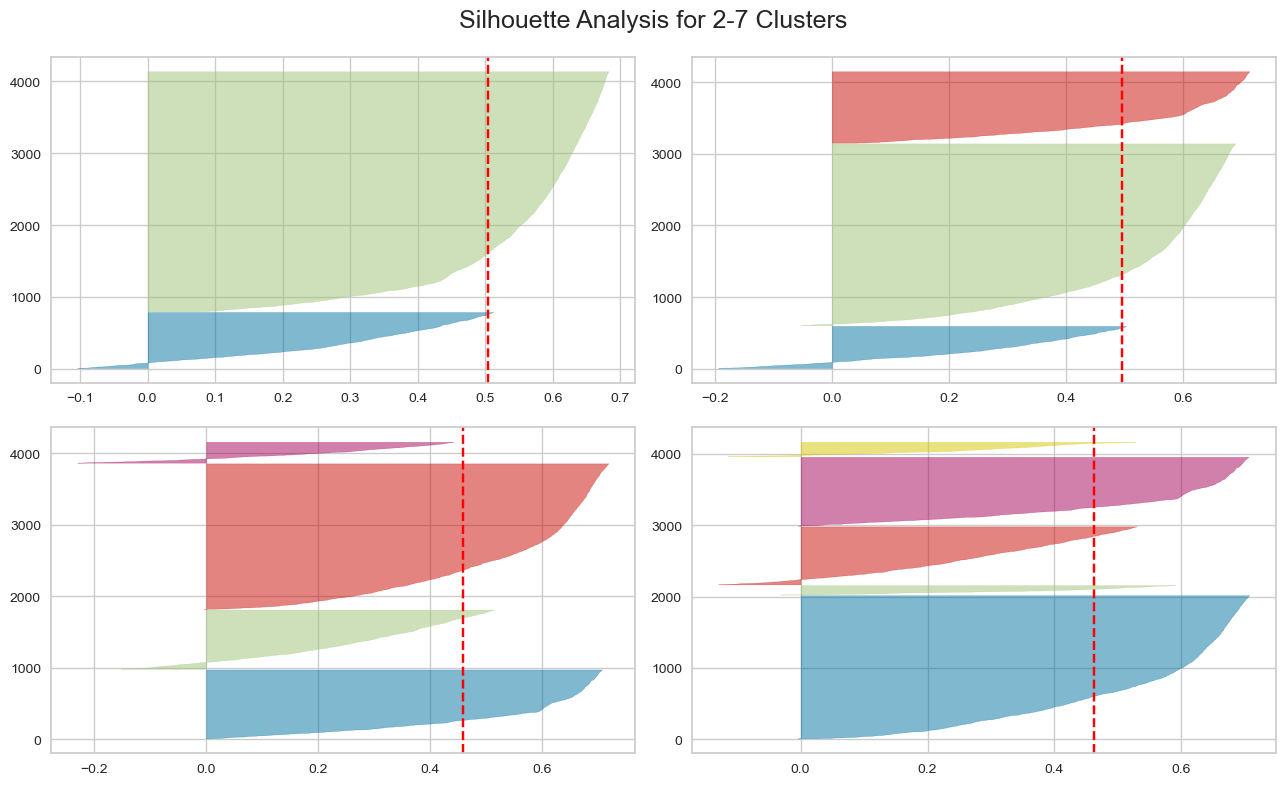

In [79]:
 from yellowbrick.cluster import SilhouetteVisualizer

# Yellowbrick extends the Scikit-Learn API to make model selection and hyperparameter tuning easier.
# You can find the code to simply create Silhouette visualisation for K-Means clusters with n_cluster as 2, 3, 4, 5 below.

fig, ax = plt.subplots(2, 2, figsize=(13,8))
fig.suptitle('Silhouette Analysis for 2-53 Clusters', size = 18)
plt.tight_layout()

for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(rfm_kmeans)

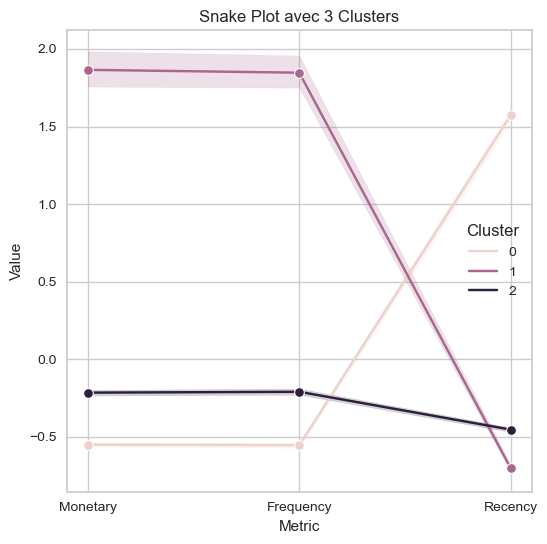

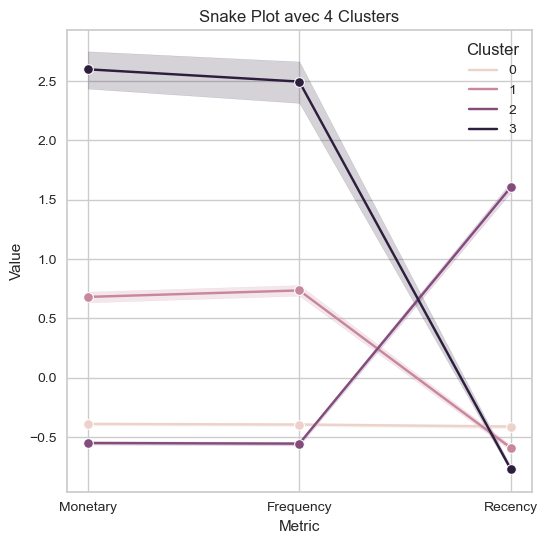

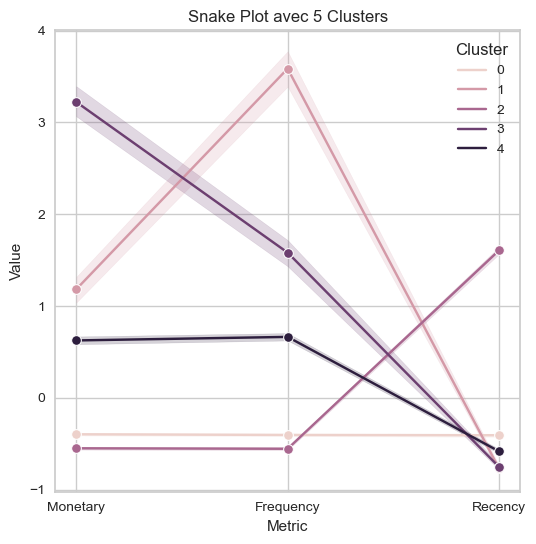

In [86]:
def snake_plot(df, num_clusters):
    # Sélectionner les colonnes pertinentes pour le snake plot
    columns_to_plot = ['Monetary', 'Frequency', 'Recency']
    
    # Créer un objet KMeans avec le nombre de clusters spécifié
    kmeans = KMeans(n_clusters=num_clusters, random_state=1)
    df['Cluster'] = kmeans.fit_predict(df[columns_to_plot])
    
    # Créer un DataFrame avec les colonnes sélectionnées et les clusters
    snake_df = df[columns_to_plot + ['Cluster']]
    
    # Melt le DataFrame pour le rendre compatible avec le snake plot
    snake_df_melted = pd.melt(snake_df, id_vars=['Cluster'], var_name='Metric', value_name='Value')
    
    # Créer un snake plot pour chaque cluster
    plt.figure(figsize=(6, 6))
    sns.lineplot(x='Metric', y='Value', hue='Cluster', data=snake_df_melted, marker='o')
    plt.title(f'Snake Plot avec {num_clusters} Clusters')
    plt.xlabel('Metric')
    plt.ylabel('Value')
    plt.show()

# Utilisation de la fonction snake_plot avec 3, 4 et 5 clusters
snake_plot(rfm_kmeans.copy(), 3)
snake_plot(rfm_kmeans.copy(), 4)
snake_plot(rfm_kmeans.copy(), 5)   

Nous choisissons 5 clusters pour les raisons suivantes :

- Présence de clusters avec des scores de silhouette inférieurs à la moyenne pour k=4.
- L'épaisseur du graphique de silhouette représentant chaque cluster, nous avons un cluster qui est significativement plus épais que les autres pour k=3.

In [87]:
# Créez un modèle K-Means avec 5 clusters
k = 5
kmeans = KMeans(n_clusters=k, random_state=42) 

# Ajustez le modèle aux données standardisées
kmeans.fit(rfm_kmeans)

# Obtenir les étiquettes de cluster pour chaque point de données
cluster_labels = kmeans.labels_

# Obtenir les coordonnées des centroïdes
centroids = kmeans.cluster_centers_

# Créez une nouvelle colonne dans le DataFrame data_initial pour stocker les étiquettes de cluster
data_cluster = rfm_kmeans.copy()
data_cluster['Cluster Kmeans'] = cluster_labels

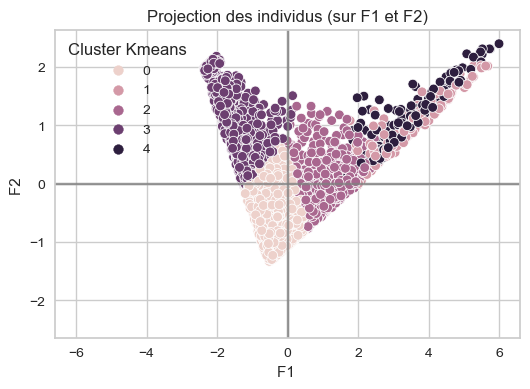

In [88]:
x_y = [0,1]
x, y = 0, 1
display_factorial_planes(X_proj, x_y, clusters=data_cluster['Cluster Kmeans'])

#### Coefficient de silhouette

In [89]:
from sklearn.metrics import silhouette_score

# Calculer le coefficient de silhouette
silhouette_avg = silhouette_score(rfm_kmeans, cluster_labels)

# Afficher le coefficient de silhouette moyen
print(f"Le coefficient de silhouette moyen pour les {k} clusters est : {silhouette_avg}")

Le coefficient de silhouette moyen pour les 5 clusters est : 0.46164351219667027


On note que l'indice de silhouette 0.46 est meilleure que celui de la segmenTation précédente basée sur les scores RFM qui était à 0.23. Avec la méthode kmeans, On a abouti à des clusters plus distincts par rapport à la segmentation précédente.

### 3.4.4 Analyse et Interprétation des Clusters K-means <a class="anchor" id="section_3_4_4"></a>

In [90]:
# Compter le nombre d'individus dans chaque cluster
count_per_cluster = data_cluster['Cluster Kmeans'].value_counts()
print(count_per_cluster)

0    2009
3     965
2     814
4     201
1     132
Name: Cluster Kmeans, dtype: int64


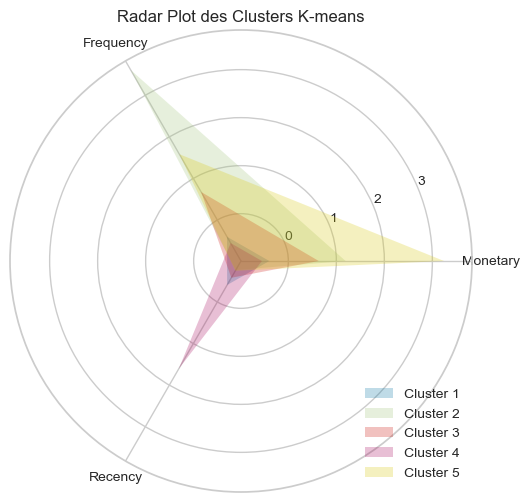

In [91]:
from Fonctions.kmeans import plot_radar_kmeans

# Définissez les caractéristiques pour le radar plot
features = ['Monetary', 'Frequency', 'Recency']

# Utilisez la fonction plot_radar_kmeans pour générer le radar plot
plot_radar_kmeans(kmeans, features)

Dans ce graphique le cluster 1 correspond au cluster noté 0, le cluster 2 au cluster noté 1,..., le cluster 5 eu cluster noté 4 dans la méthode kmeans.


- Cluster 0 : "Occasionnels Prudents"
Ce groupe rassemble les clients qui ont effectué des achats il y a longtemps, qui n'achètent pas très souvent et qui dépensent relativement peu.

- Cluster 1 :"Réguliers Équilibrés"
Les clients de ce groupe sont caractérisés par leur fréquence d'achat élevée et leurs dépenses moyennes.

- Cluster 2 : "Occasionnels Économes"
Ce cluster réunit les clients qui ont effectué des achats il y a longtemps, qui n'achètent pas souvent et qui dépensent peu.

- Cluster 3 : "Nouveaux Acheteurs Prudents"
Dans ce groupe, on retrouve des clients qui ont effectué des achats récemment, mais qui dépensent peu et n'achètent pas fréquemment.

- Cluster 4 : "Fidèles Dépensiers"
Les clients de ce cluster ont une fréquence d'achat modérée, mais dépensent davantage que les autres groupes.

In [94]:
data_cluster.groupby("Cluster Kmeans").agg(
    {"mean", "std", "max", "min"}
)

Monetary                               Frequency            \
                     std      mean       max       min       std      mean   
Cluster Kmeans                                                               
0               0.289280 -0.395544  0.966371 -0.806355  0.299563 -0.402116   
1               0.839266  1.193758  3.766307 -0.100187  1.123521  3.606915   
2               0.600570  0.633435  2.332458 -0.501550  0.579231  0.674497   
3               0.225986 -0.549806  1.023418 -0.808029  0.252754 -0.554925   
4               1.188327  3.243869  7.847539  1.785820  1.067043  1.583084   

                                     Recency                                
                     max       min       std      mean       max       min  
Cluster Kmeans                                                              
0               0.737859 -0.807445  0.392334 -0.409156  0.655221 -0.936343  
1               6.872596  2.085642  0.183552 -0.767385  0.121277 -0.936343  
2               2.306399 -0.807445  0.353210 -0.582786  1.035143 -0.936343  
3               1.283943 -0.807445  0.650569  1.604903  2.893679  0.552539  
4               4.502356 -0.772588  0.205748 -0.751516  0.223958 -0.936343

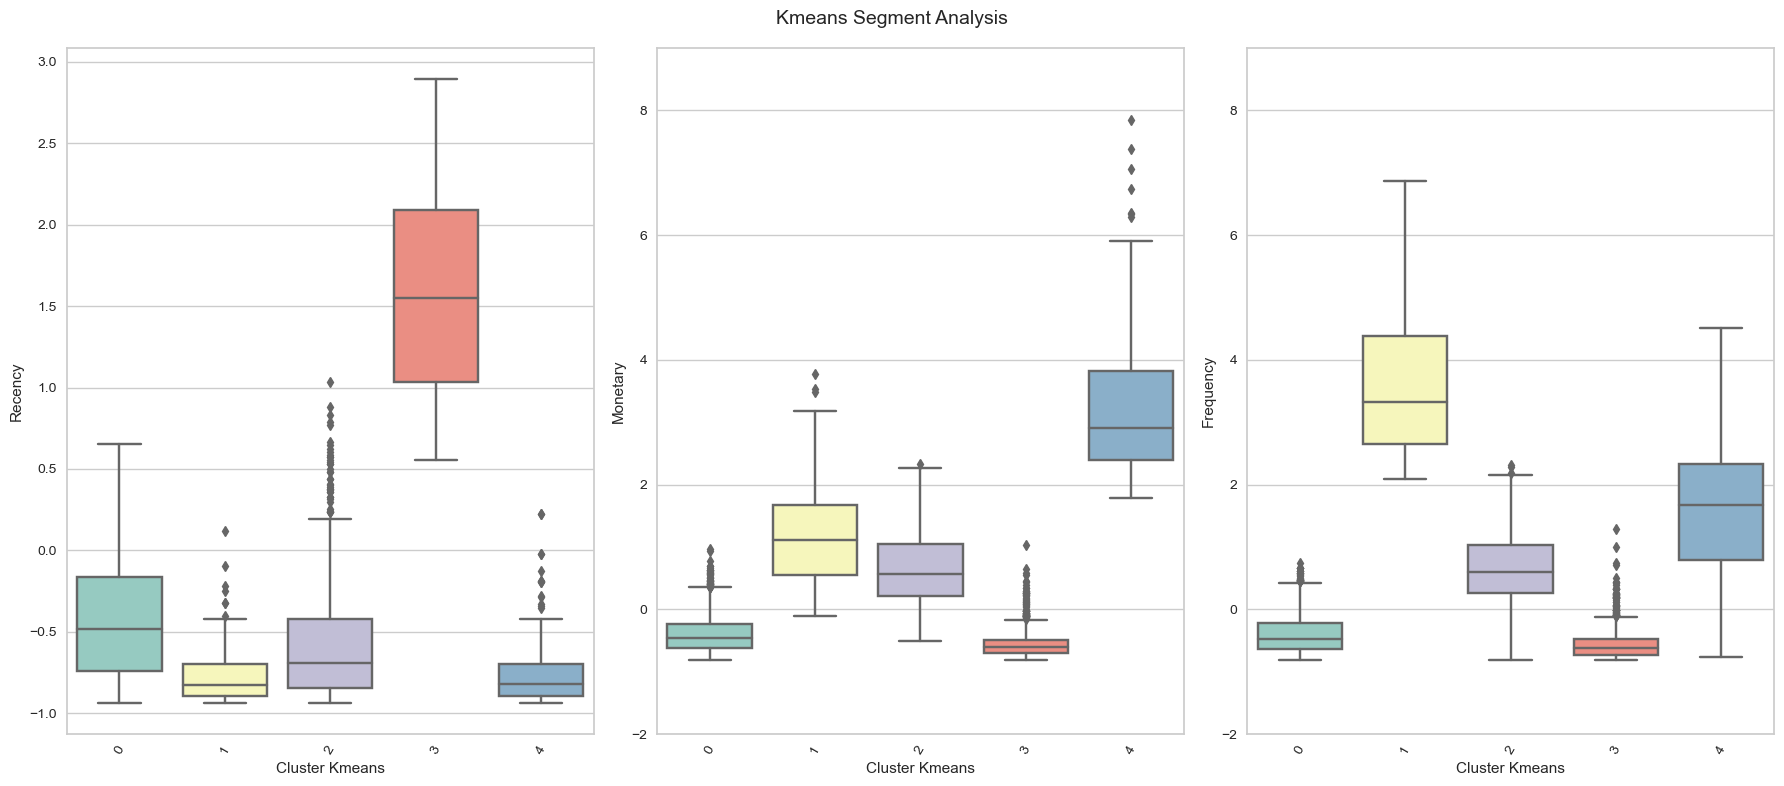

In [92]:
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
fig.suptitle("Kmeans Segment Analysis", size=14)
feature_list = ["Recency", "Monetary", "Frequency"]
for idx, col in enumerate(feature_list):
    sns.boxplot(
        ax=axes[idx], data=data_cluster, x="Cluster Kmeans", y=feature_list[idx], palette=palette
    )
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=60)
    if idx == 1:
        axes[idx].set_ylim([-2, 9])
    if idx == 2:
        axes[idx].set_ylim([-2, 9])
plt.tight_layout()
plt.show()

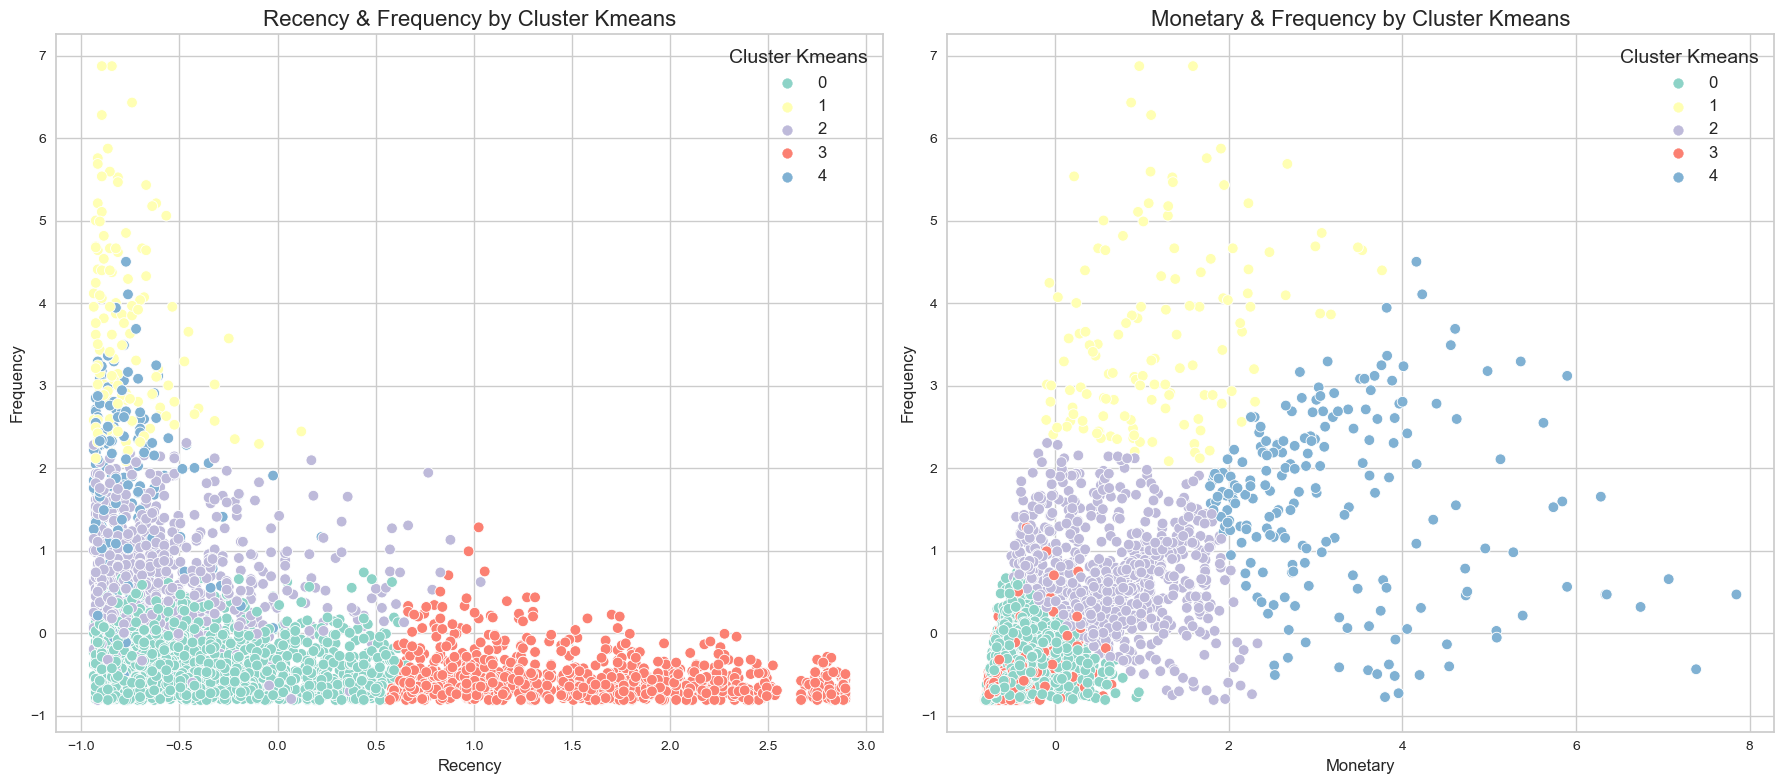

In [93]:
plt.figure(figsize=(18, 8))

# Premier sous-tracé pour Recency & Frequency
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=data_cluster, x="Recency", y="Frequency", hue="Cluster Kmeans", palette="Set3", s=60
)
plt.title("Recency & Frequency by Cluster Kmeans", size=16)
plt.xlabel("Recency", size=12)
plt.ylabel("Frequency", size=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.legend(loc="best", fontsize=12, title="Cluster Kmeans", title_fontsize=14)

# Deuxième sous-tracé pour Monetary & Frequency
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=data_cluster, x="Monetary", y="Frequency", hue="Cluster Kmeans", palette="Set3", s=60
)
plt.title("Monetary & Frequency by Cluster Kmeans", size=16)
plt.xlabel("Monetary", size=12)
plt.ylabel("Frequency", size=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.legend(loc="best", fontsize=12, title="Cluster Kmeans", title_fontsize=14)

plt.tight_layout()
plt.show()